### Synaptic sign switching simulation: Active Neuron Constraint
#### Shun Li | Elliot Jerng

Goal:
- sequentially reduce the number of updatable weights
- compare learning in Dale's Law network vs. co-release circuit as we reduce the number of active weights.

In [ ]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn.utils import clip_grad_value_
from torch.utils.data import DataLoader, TensorDataset, Dataset, random_split

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import torch.optim as optim
import os
import json
import time
import wandb
import pickle
from copy import deepcopy

from train import (TrainerMLE, CustomWeightDecayOptimizer, MNIST, CustomAdam)
from model_setup import Corelease_Model, TopKLinear

from utils import (
    weight_changes, plot_distance, plot_loss, generate_opto_loader, get_activations,
    plot_layer_activation, scatterboxplot, imshow, calculate_weights, calculate_EIindex,
    get_training_params, save_weights_to_pickle, load_weights_from_pickle,
    calculate_weight_metrics, calculate_all_weight_metrics, plot_excitatory_inhibitory_scatter,
    plot_weight_histograms, plot_weight_differences, plot_EI_index_distribution
)


Running with dales_law = True

MNIST_TopK_MSE_dalesTrue_0
Updatable weights: 0.5


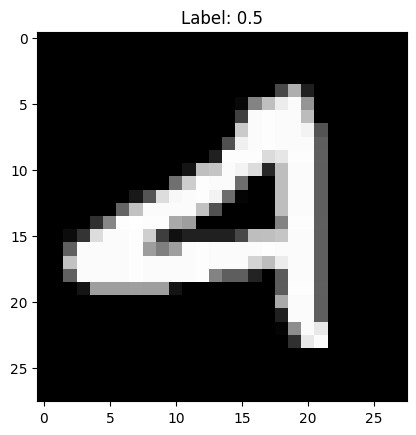

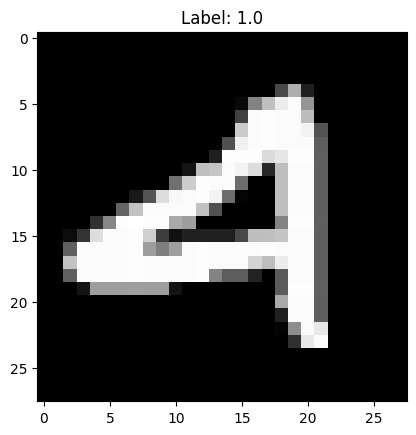

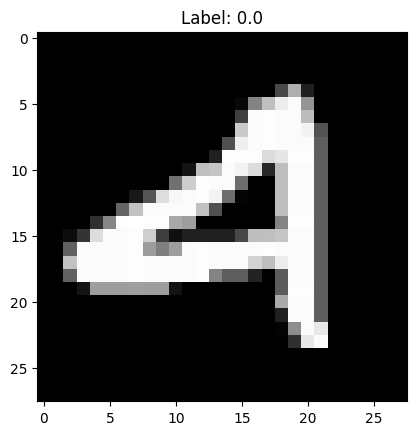

EP.pre_w: Positive: 50.00%; Negative: 50.00%; Zero: 0.00%
EP.sign_matrix: Positive: 49.92%; Negative: 50.08%; Zero: 0.00%
EP.final_weight: Positive: 49.92%; Negative: 50.08%; Zero: 0.00%
LHb.pre_w: Positive: 50.07%; Negative: 49.93%; Zero: 0.00%
LHb.sign_matrix: Positive: 50.09%; Negative: 49.91%; Zero: 0.00%
LHb.final_weight: Positive: 50.09%; Negative: 49.91%; Zero: 0.00%
DAN.pre_w: Positive: 52.15%; Negative: 47.85%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.09 | validation loss: 0.02
time elapsed: 2.26 s | predicted time remaining: 42.95 s
 ----   Epoch 2  ---- 
training loss: 0.02 | validation loss: 0.02
time elapsed: 4.29 s | predicted time remaining: 38.59 s
 ----   Epoch 3  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 6.37 s | predicted time remaining: 36.09 s
 ----   Epoch 4  ---- 
training loss: 0.01 | validation loss:

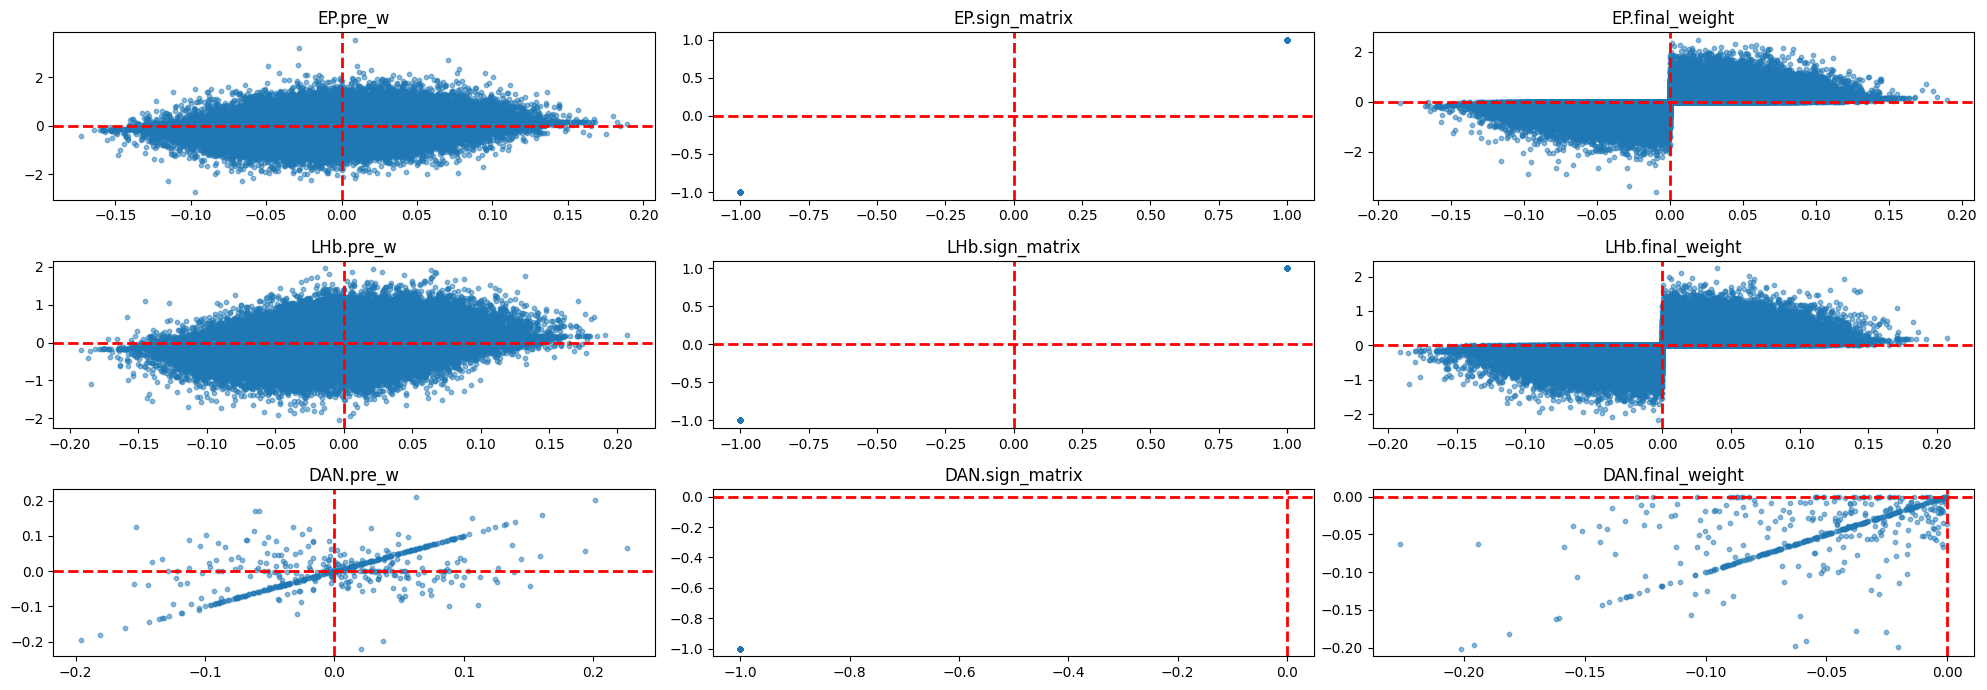

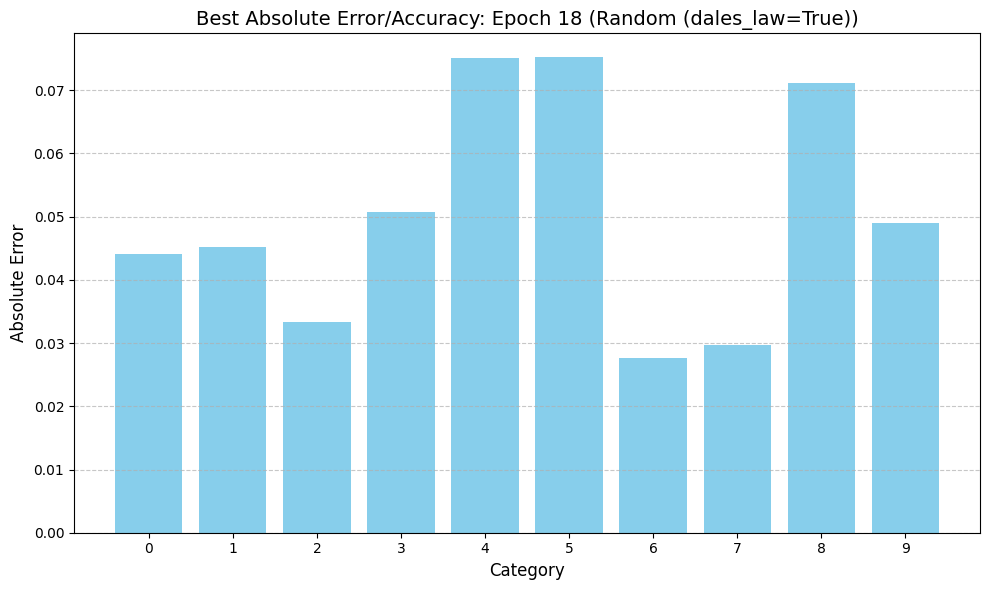

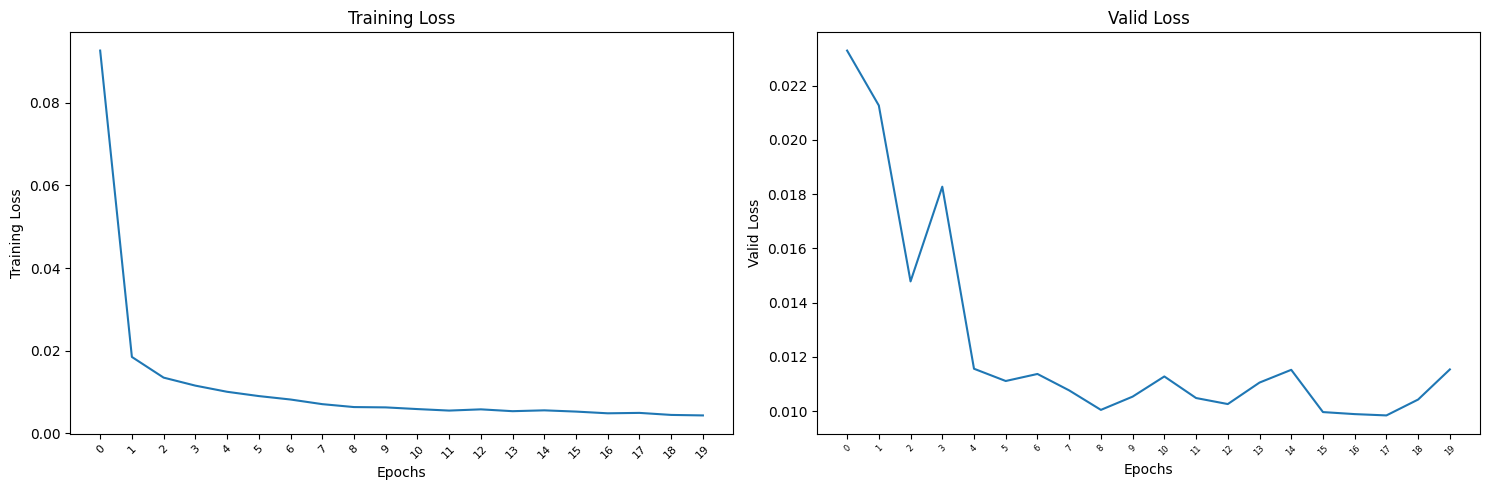

EP.pre_w: Positive: 49.99%; Negative: 50.01%; Zero: 0.00%
EP.sign_matrix: Positive: 49.92%; Negative: 50.08%; Zero: 0.00%
EP.final_weight: Positive: 49.92%; Negative: 50.08%; Zero: 0.00%
LHb.pre_w: Positive: 50.06%; Negative: 49.94%; Zero: 0.00%
LHb.sign_matrix: Positive: 50.09%; Negative: 49.91%; Zero: 0.00%
LHb.final_weight: Positive: 50.09%; Negative: 49.91%; Zero: 0.00%
DAN.pre_w: Positive: 51.37%; Negative: 48.63%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 2.48 s | predicted time remaining: 47.14 s
 ----   Epoch 2  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 4.50 s | predicted time remaining: 40.53 s
 ----   Epoch 3  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 6.66 s | predicted time remaining: 37.75 s
 ----   Epoch 4  ---- 
training loss: 0.00 | validation loss:

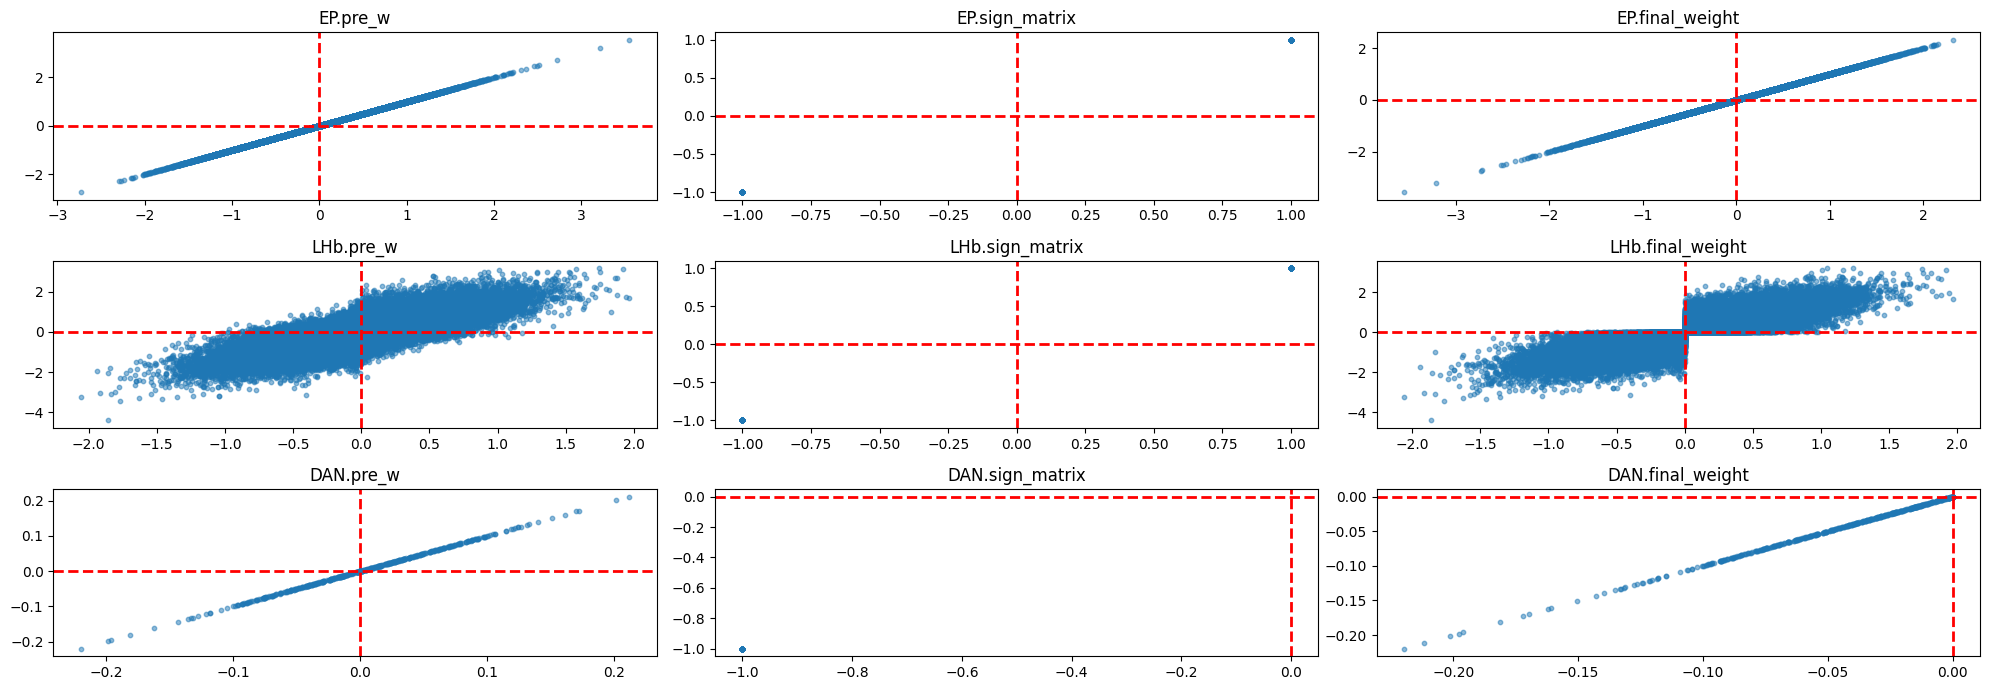

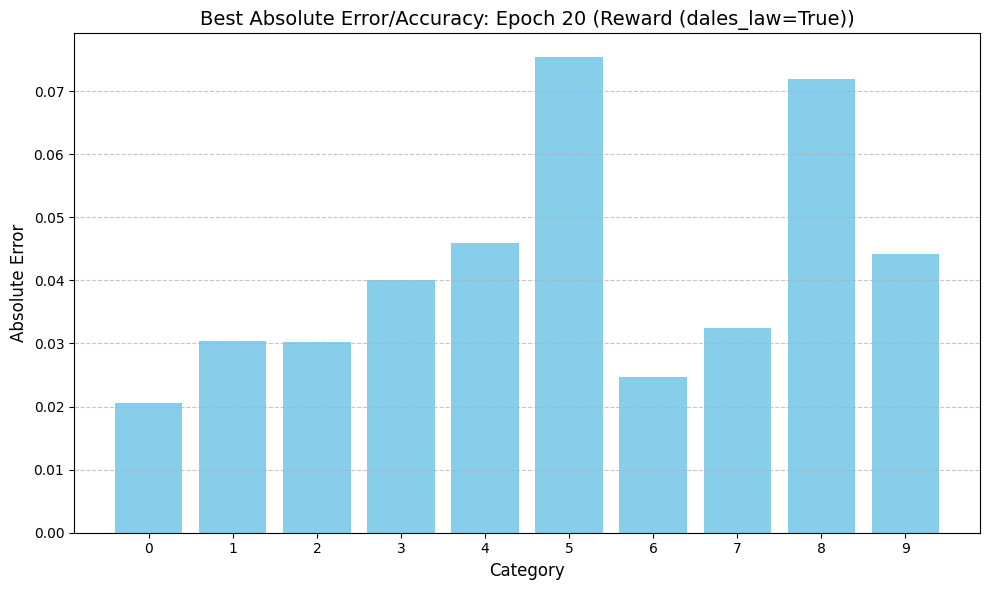

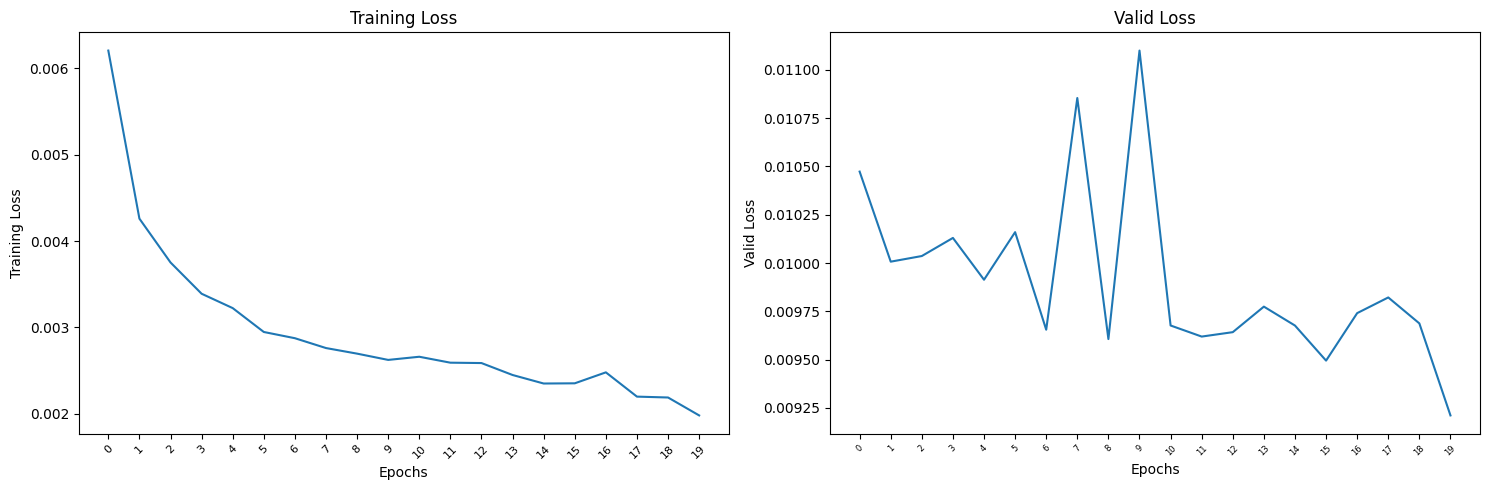

EP.pre_w: Positive: 49.99%; Negative: 50.01%; Zero: 0.00%
EP.sign_matrix: Positive: 49.92%; Negative: 50.08%; Zero: 0.00%
EP.final_weight: Positive: 49.92%; Negative: 50.08%; Zero: 0.00%
LHb.pre_w: Positive: 49.94%; Negative: 50.06%; Zero: 0.00%
LHb.sign_matrix: Positive: 50.09%; Negative: 49.91%; Zero: 0.00%
LHb.final_weight: Positive: 50.09%; Negative: 49.91%; Zero: 0.00%
DAN.pre_w: Positive: 51.37%; Negative: 48.63%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 3.54 s | predicted time remaining: 67.34 s
 ----   Epoch 2  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 5.98 s | predicted time remaining: 53.79 s
 ----   Epoch 3  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 8.36 s | predicted time remaining: 47.39 s
 ----   Epoch 4  ---- 
training loss: 0.00 | validation loss:

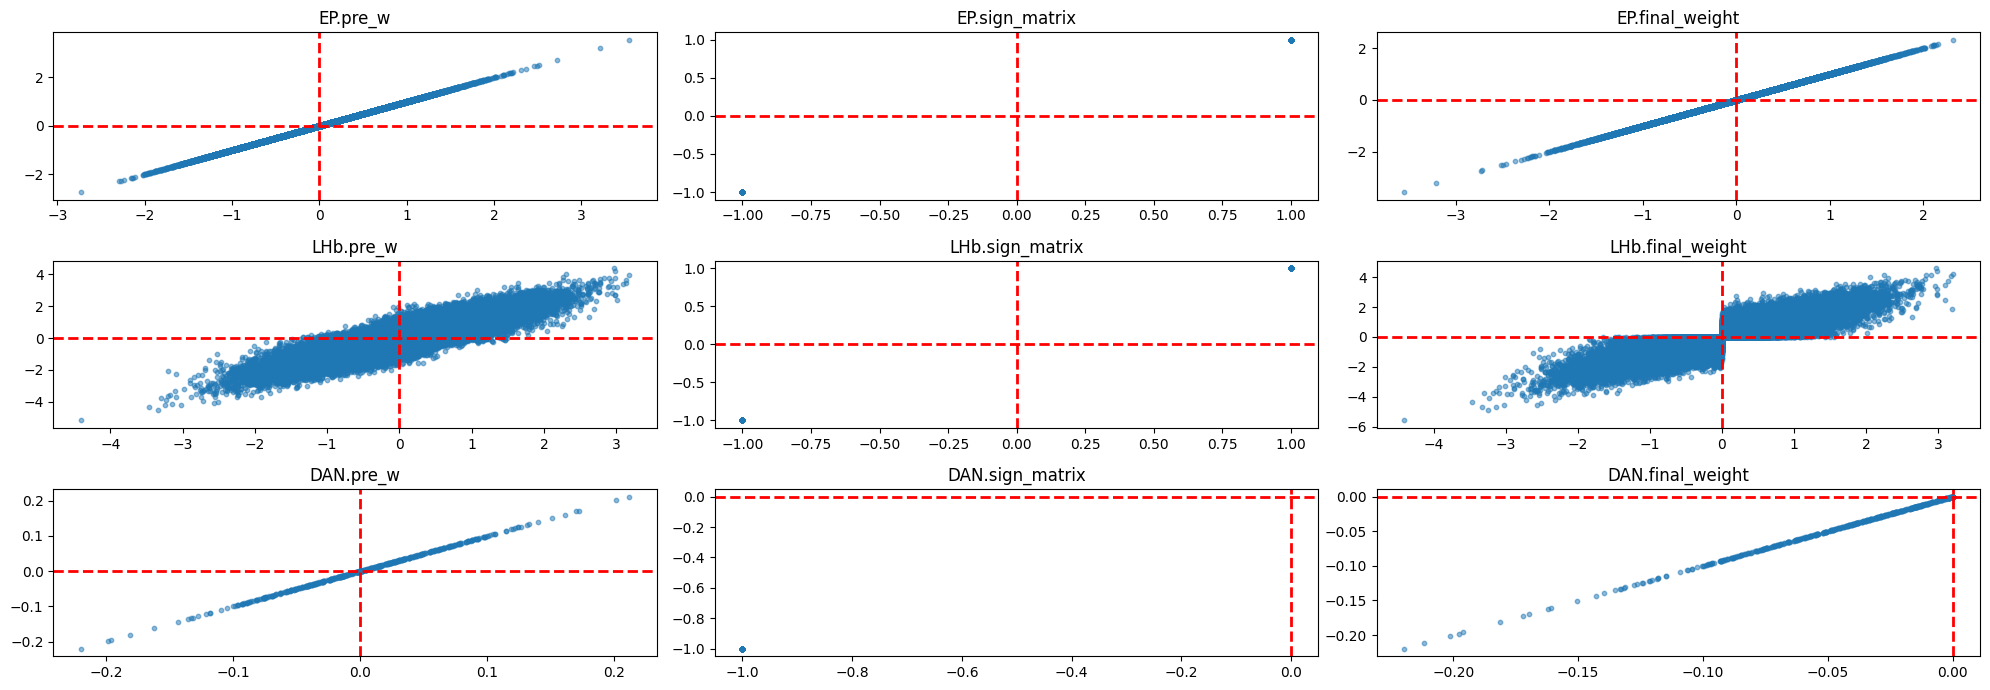

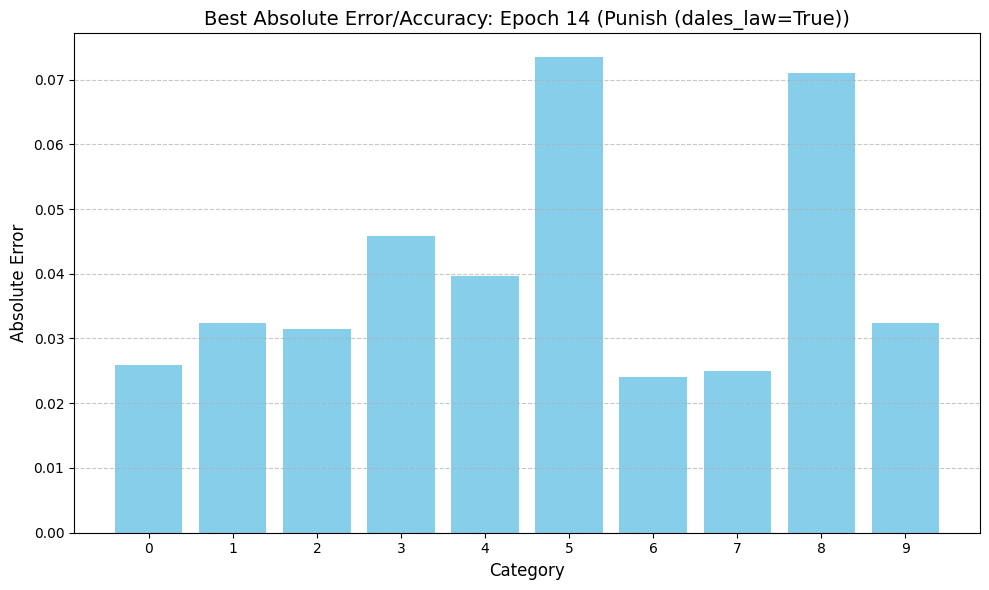

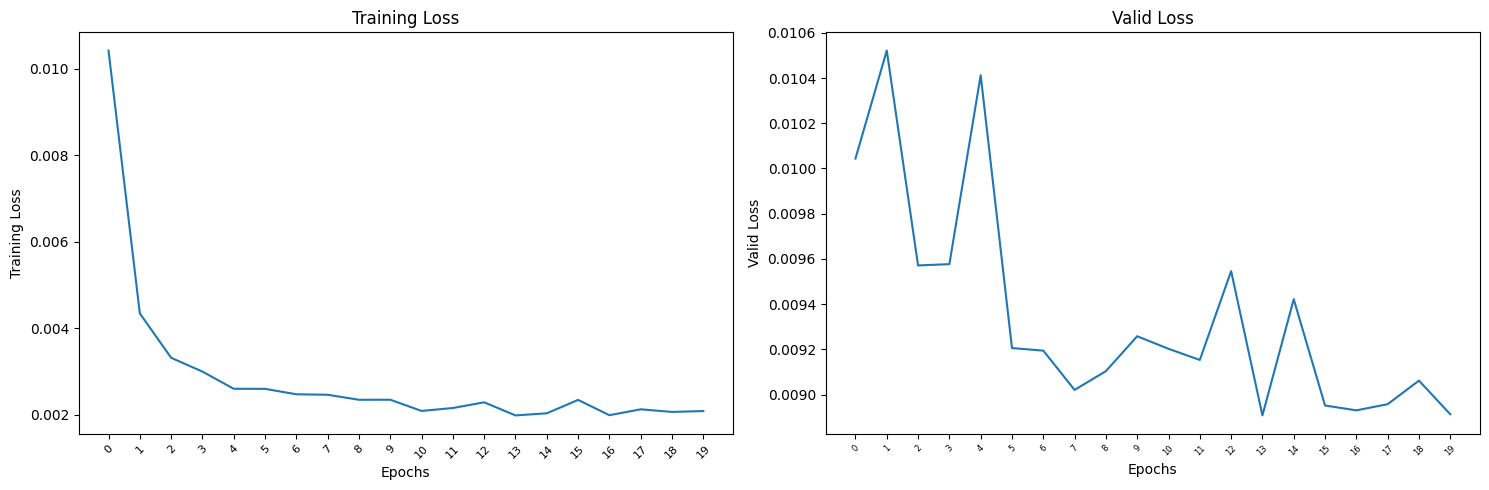

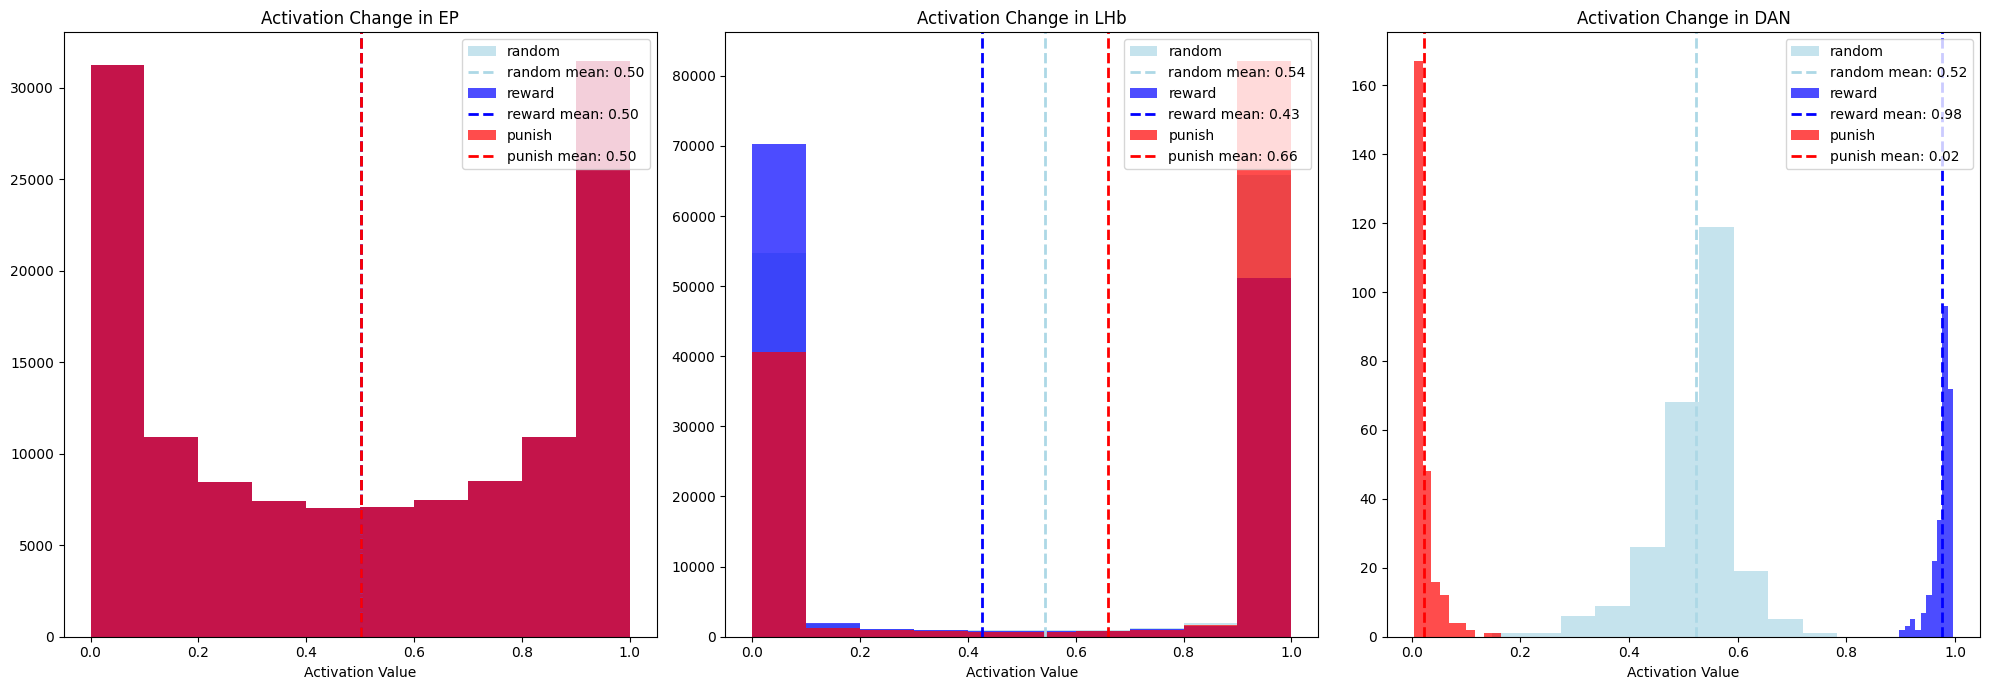

MNIST_TopK_MSE_dalesTrue_1
Updatable weights: 1


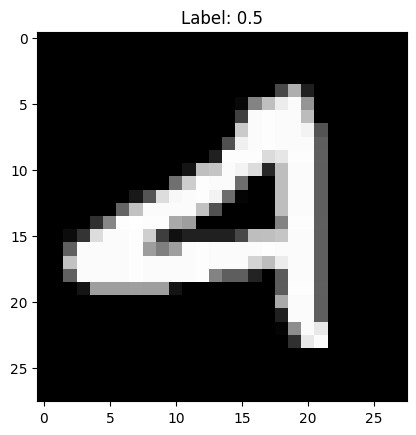

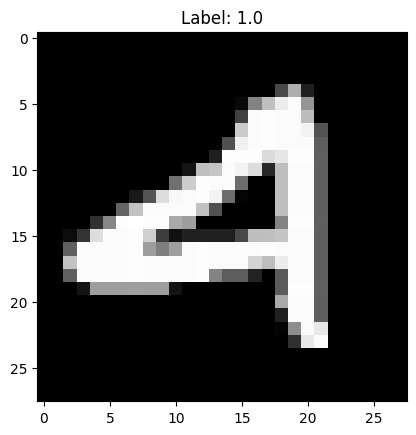

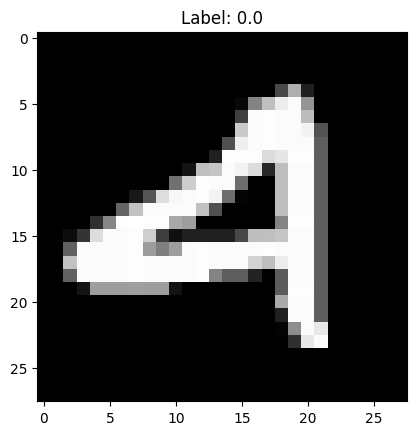

EP.pre_w: Positive: 49.97%; Negative: 50.03%; Zero: 0.00%
EP.sign_matrix: Positive: 49.87%; Negative: 50.13%; Zero: 0.00%
EP.final_weight: Positive: 49.87%; Negative: 50.13%; Zero: 0.00%
LHb.pre_w: Positive: 50.03%; Negative: 49.97%; Zero: 0.00%
LHb.sign_matrix: Positive: 49.97%; Negative: 50.03%; Zero: 0.00%
LHb.final_weight: Positive: 49.97%; Negative: 50.03%; Zero: 0.00%
DAN.pre_w: Positive: 49.22%; Negative: 50.78%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.11 | validation loss: 0.03
time elapsed: 3.03 s | predicted time remaining: 57.51 s
 ----   Epoch 2  ---- 
training loss: 0.02 | validation loss: 0.02
time elapsed: 5.94 s | predicted time remaining: 53.45 s
 ----   Epoch 3  ---- 
training loss: 0.01 | validation loss: 0.02
time elapsed: 8.46 s | predicted time remaining: 47.94 s
 ----   Epoch 4  ---- 
training loss: 0.01 | validation loss:

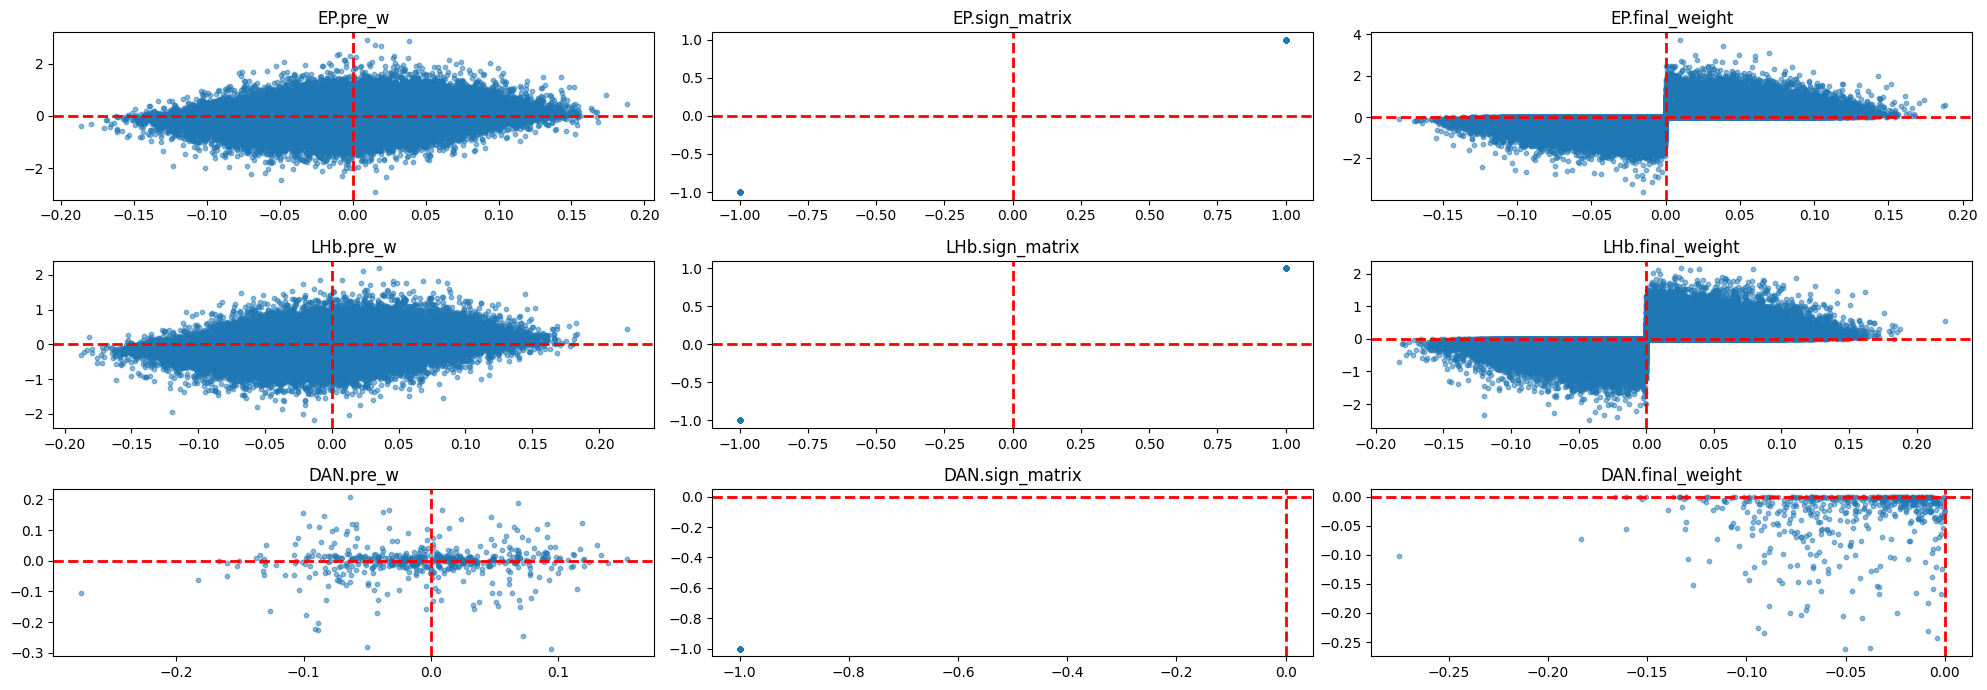

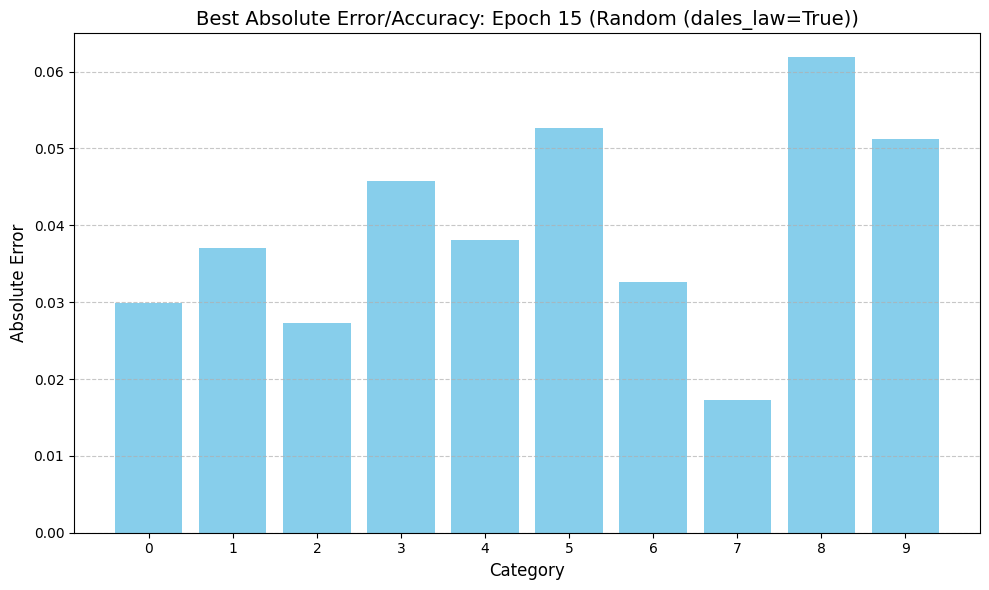

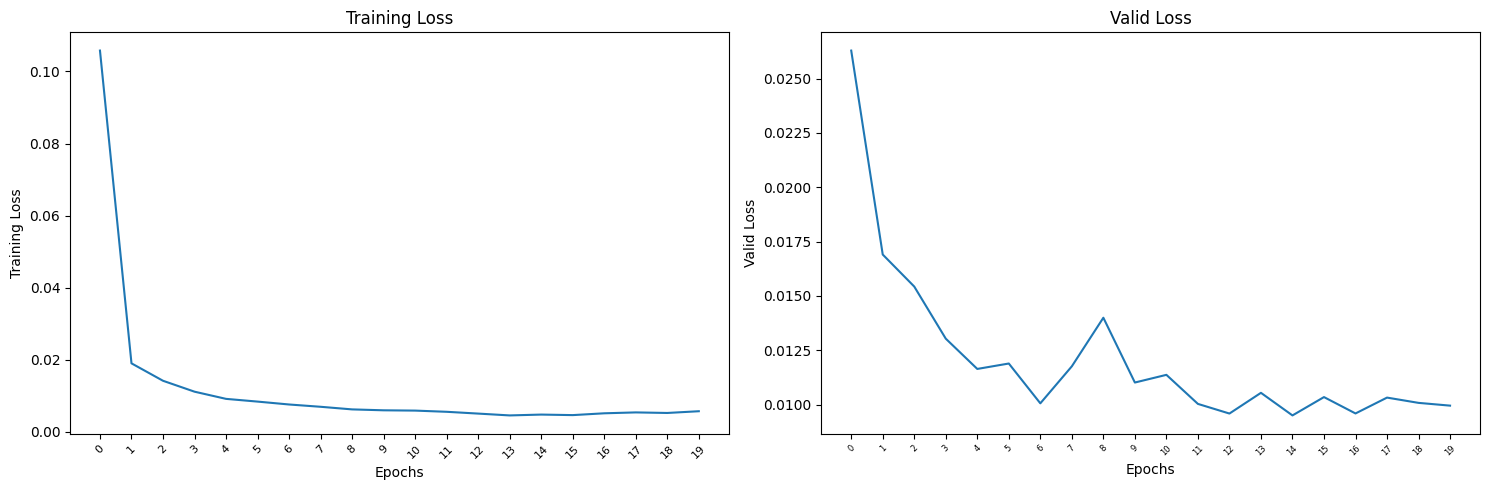

EP.pre_w: Positive: 49.93%; Negative: 50.07%; Zero: 0.00%
EP.sign_matrix: Positive: 49.87%; Negative: 50.13%; Zero: 0.00%
EP.final_weight: Positive: 49.87%; Negative: 50.13%; Zero: 0.00%
LHb.pre_w: Positive: 50.16%; Negative: 49.84%; Zero: 0.00%
LHb.sign_matrix: Positive: 49.97%; Negative: 50.03%; Zero: 0.00%
LHb.final_weight: Positive: 49.97%; Negative: 50.03%; Zero: 0.00%
DAN.pre_w: Positive: 50.39%; Negative: 49.61%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 2.56 s | predicted time remaining: 48.62 s
 ----   Epoch 2  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 4.75 s | predicted time remaining: 42.72 s
 ----   Epoch 3  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 7.15 s | predicted time remaining: 40.51 s
 ----   Epoch 4  ---- 
training loss: 0.00 | validation loss:

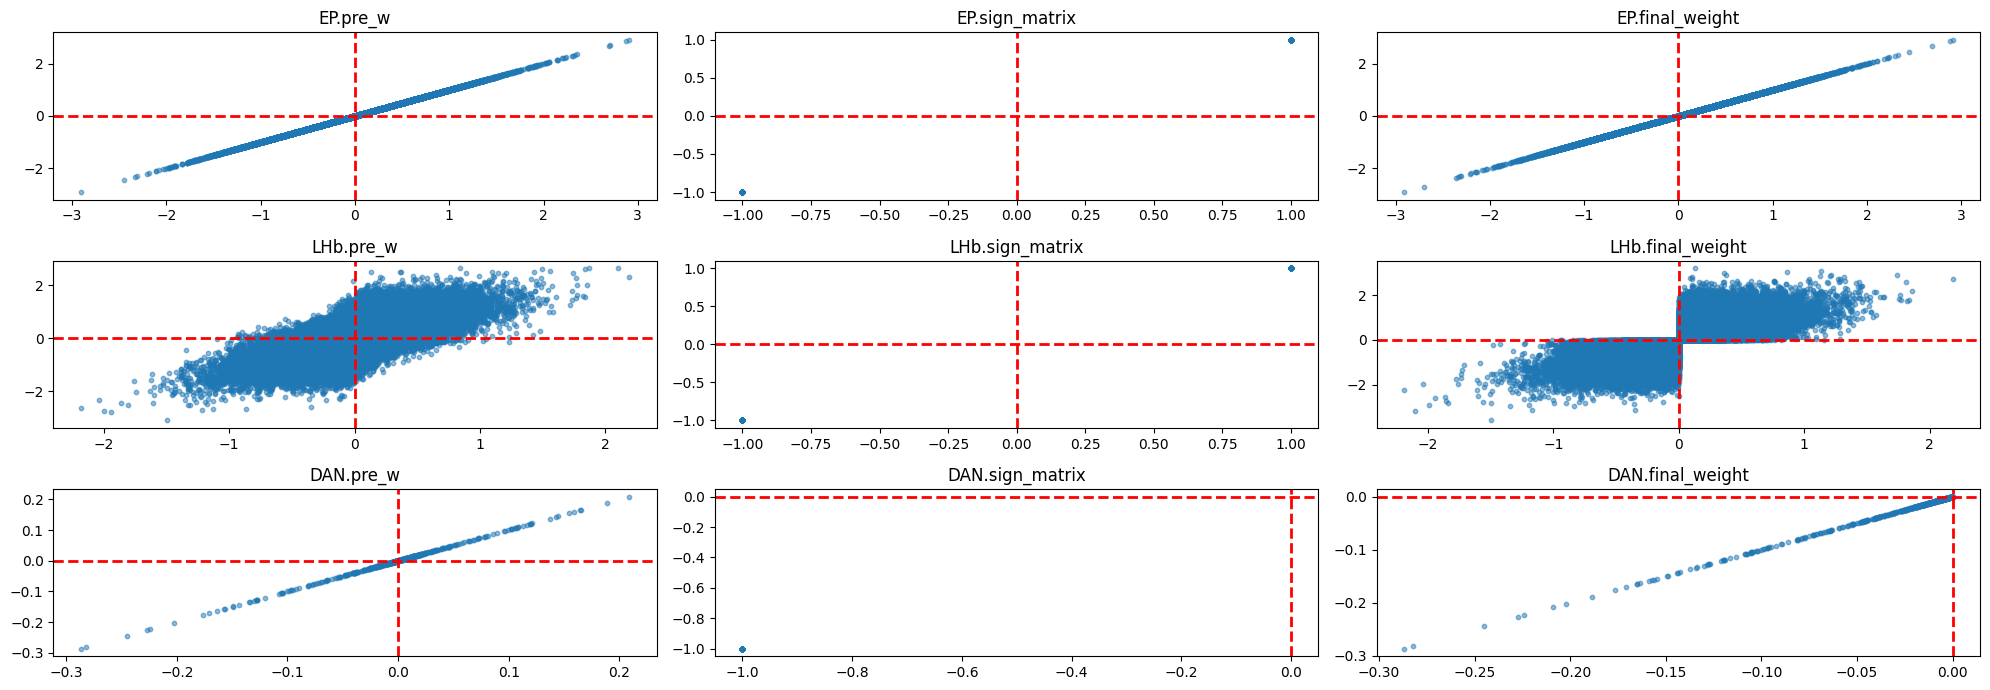

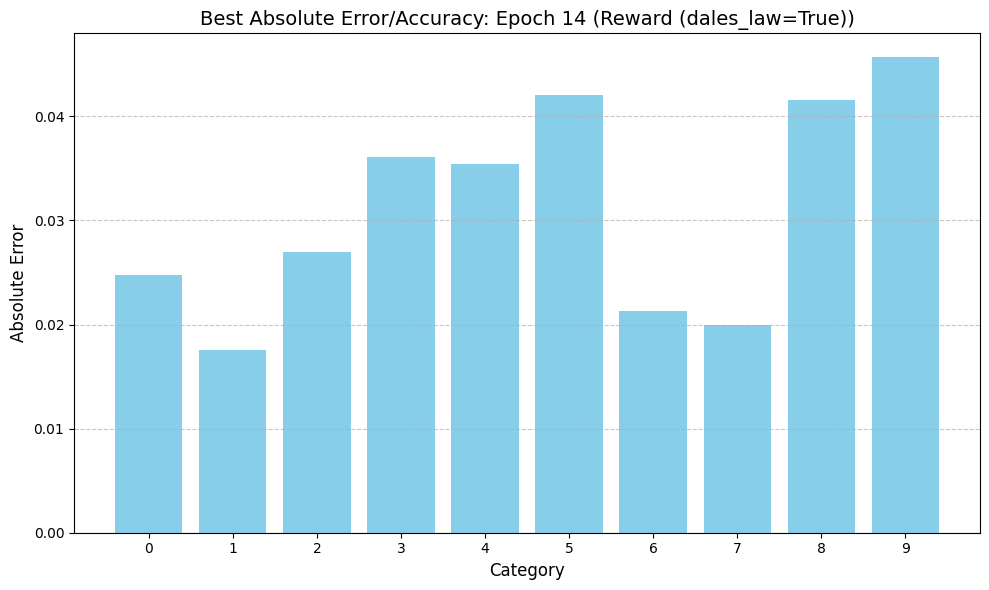

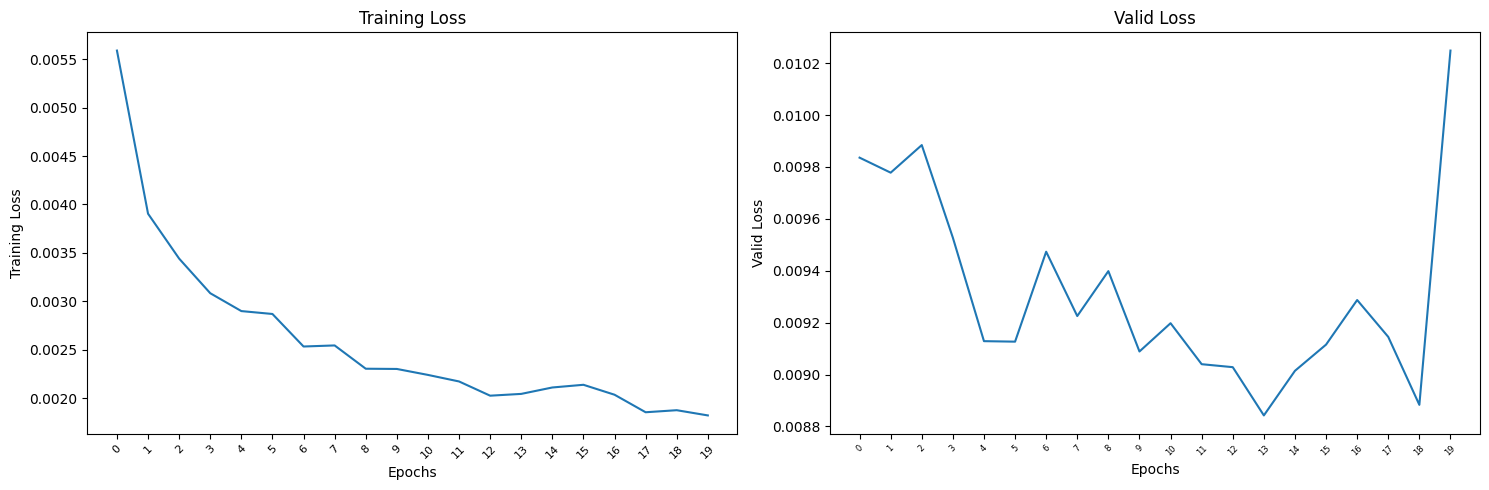

EP.pre_w: Positive: 49.93%; Negative: 50.07%; Zero: 0.00%
EP.sign_matrix: Positive: 49.87%; Negative: 50.13%; Zero: 0.00%
EP.final_weight: Positive: 49.87%; Negative: 50.13%; Zero: 0.00%
LHb.pre_w: Positive: 50.17%; Negative: 49.83%; Zero: 0.00%
LHb.sign_matrix: Positive: 49.97%; Negative: 50.03%; Zero: 0.00%
LHb.final_weight: Positive: 49.97%; Negative: 50.03%; Zero: 0.00%
DAN.pre_w: Positive: 50.39%; Negative: 49.61%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 2.70 s | predicted time remaining: 51.29 s
 ----   Epoch 2  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 4.95 s | predicted time remaining: 44.51 s
 ----   Epoch 3  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 7.44 s | predicted time remaining: 42.17 s
 ----   Epoch 4  ---- 
training loss: 0.00 | validation loss:

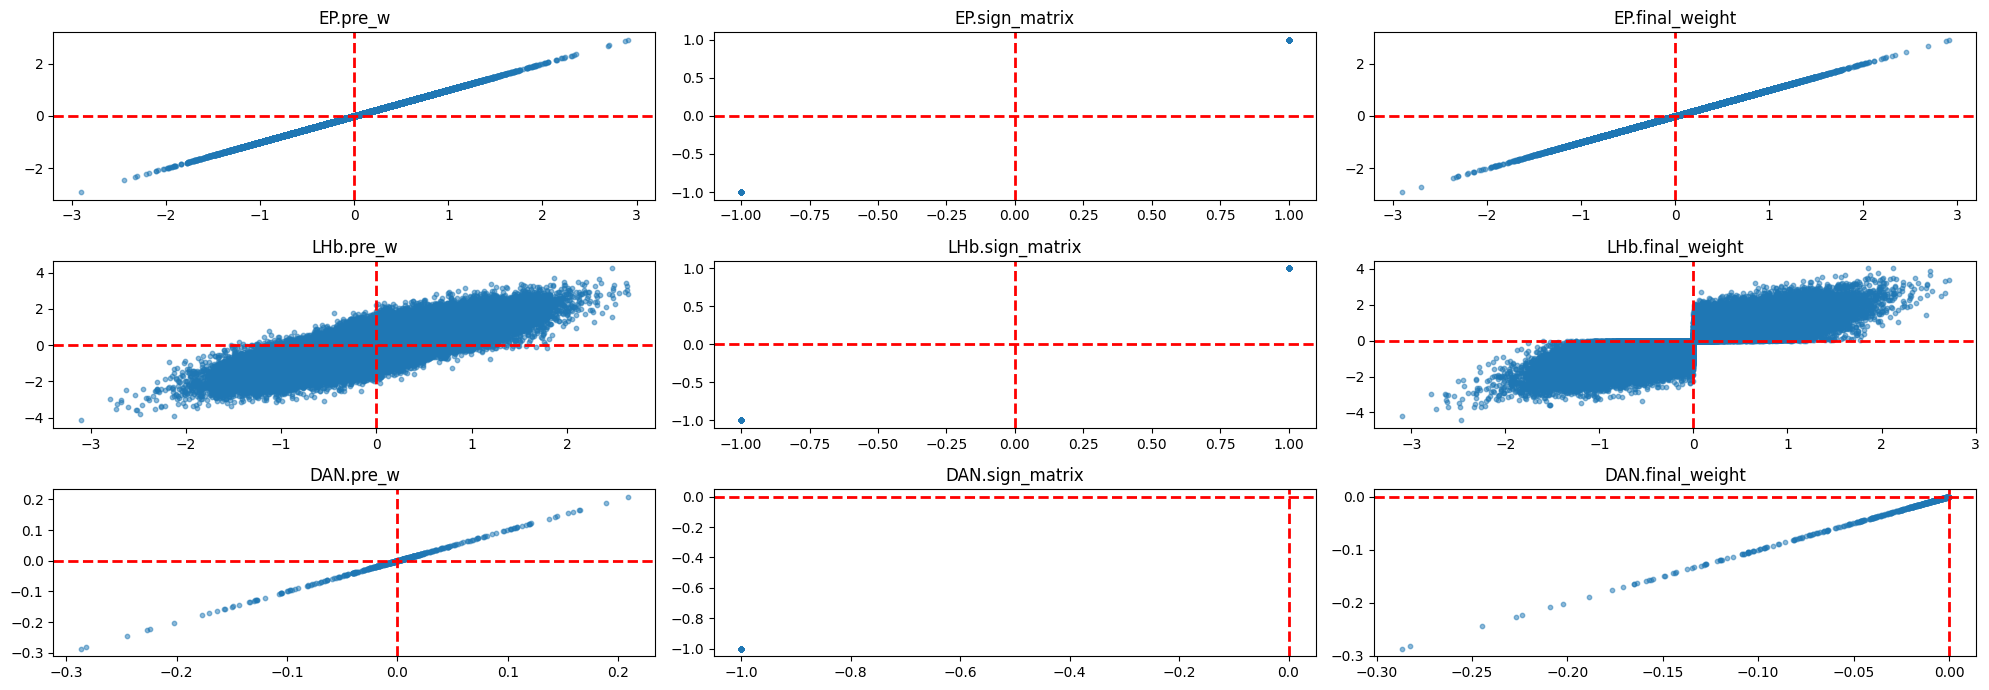

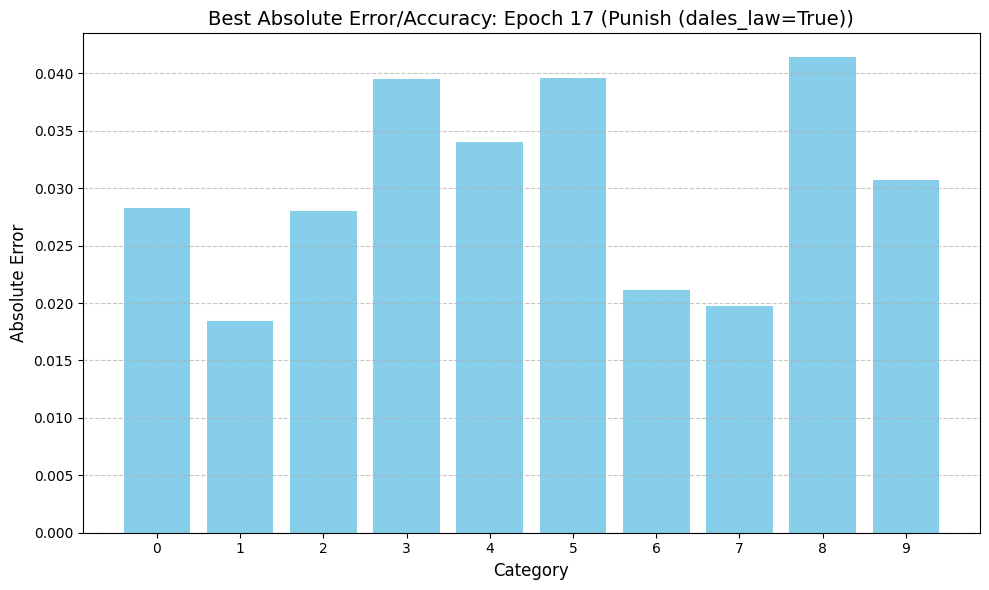

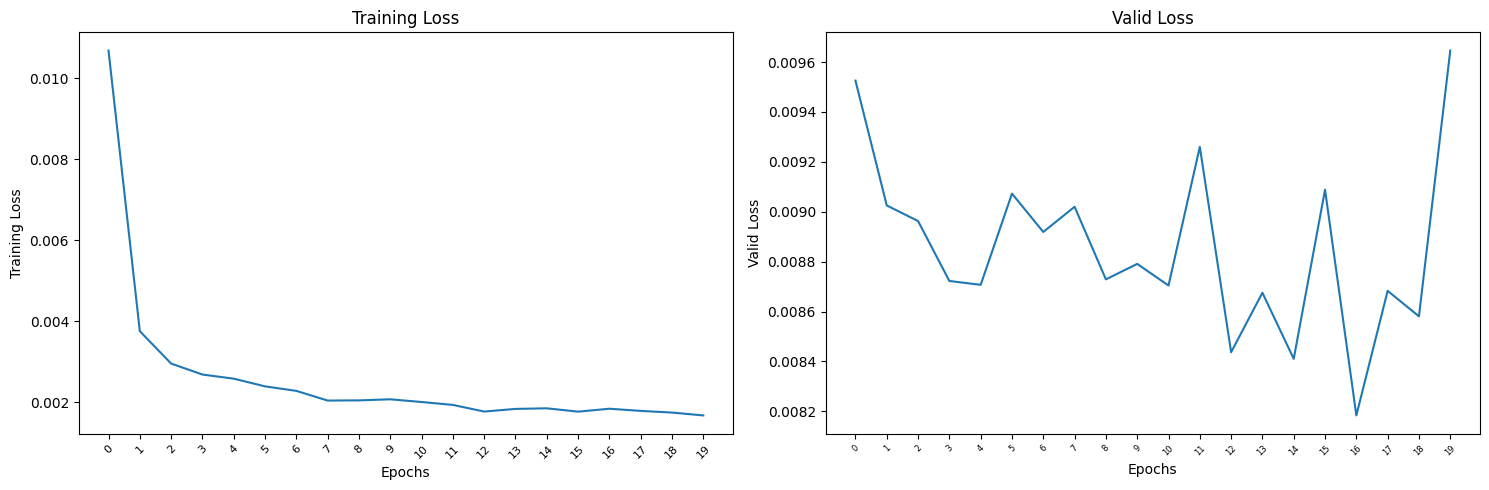

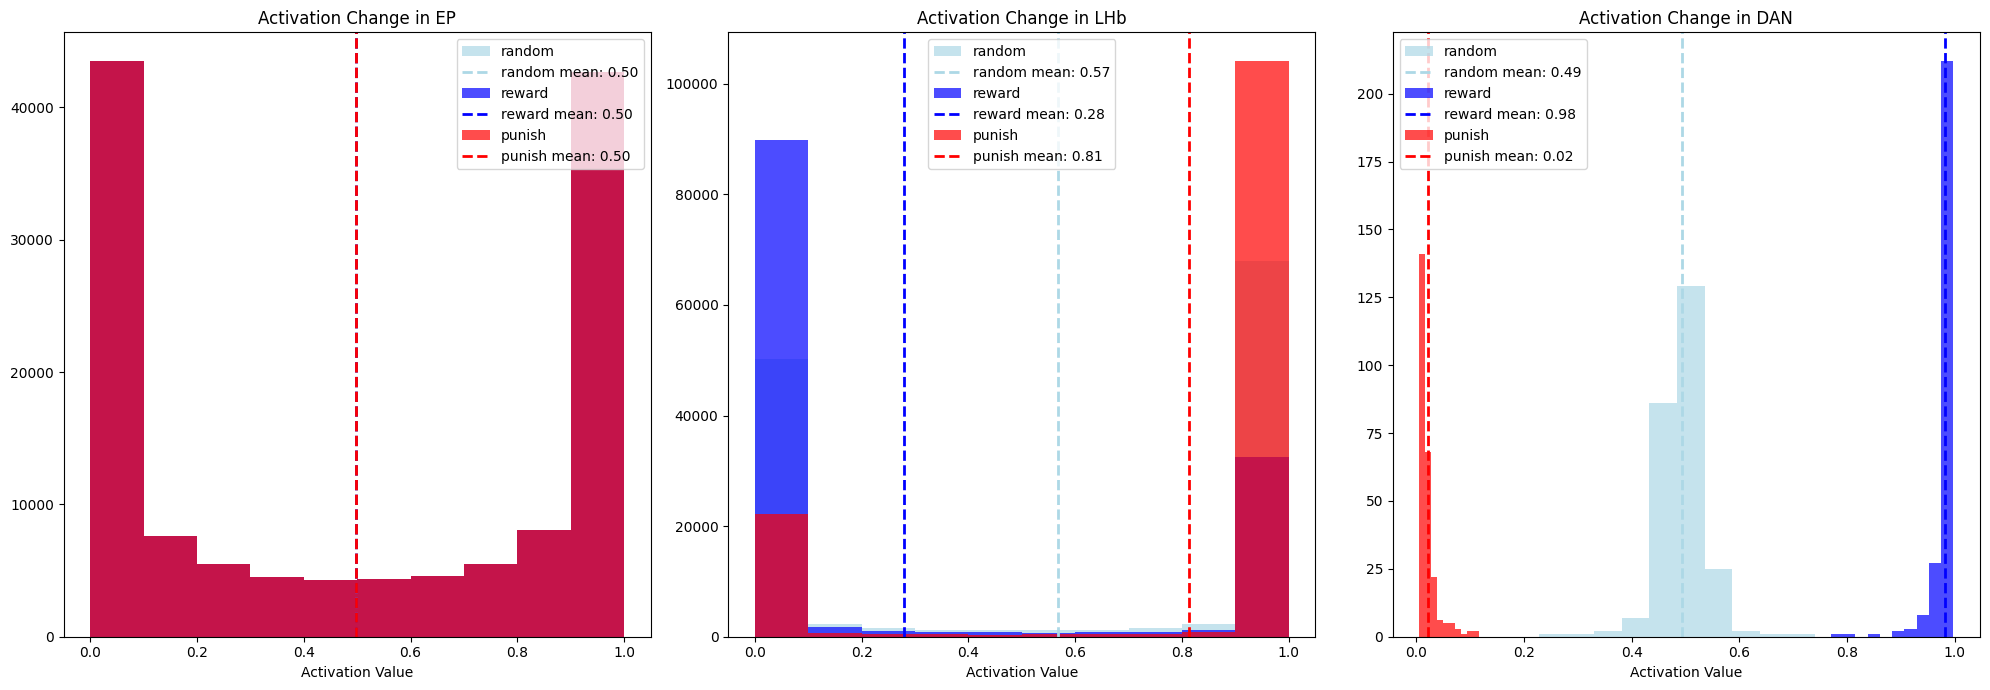


Running with dales_law = False

MNIST_TopK_MSE_dalesFalse_0
Updatable weights: 0.5


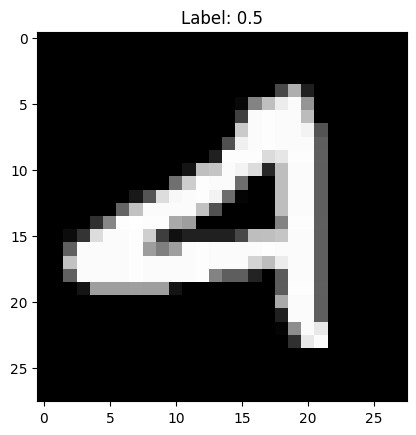

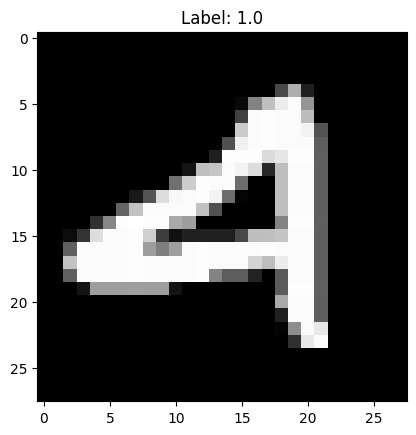

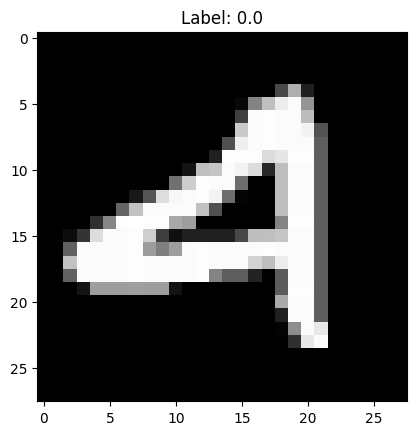

EP.pre_w_pos: Positive: 49.94%; Negative: 50.06%; Zero: 0.00%
EP.pre_w_neg: Positive: 50.03%; Negative: 49.97%; Zero: 0.00%
EP.sign_matrix: Positive: 49.93%; Negative: 50.07%; Zero: 0.00%
EP.final_weight: Positive: 49.94%; Negative: 50.06%; Zero: 0.00%
LHb.pre_w_pos: Positive: 49.96%; Negative: 50.04%; Zero: 0.00%
LHb.pre_w_neg: Positive: 50.12%; Negative: 49.88%; Zero: 0.00%
LHb.sign_matrix: Positive: 50.12%; Negative: 49.88%; Zero: 0.00%
LHb.final_weight: Positive: 49.82%; Negative: 50.18%; Zero: 0.00%
DAN.pre_w: Positive: 49.02%; Negative: 50.98%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.10 | validation loss: 0.03
time elapsed: 2.70 s | predicted time remaining: 51.24 s
 ----   Epoch 2  ---- 
training loss: 0.02 | validation loss: 0.02
time elapsed: 5.35 s | predicted time remaining: 48.14 s
 ----   Epoch 3  ---- 
training loss: 0.01 | validat

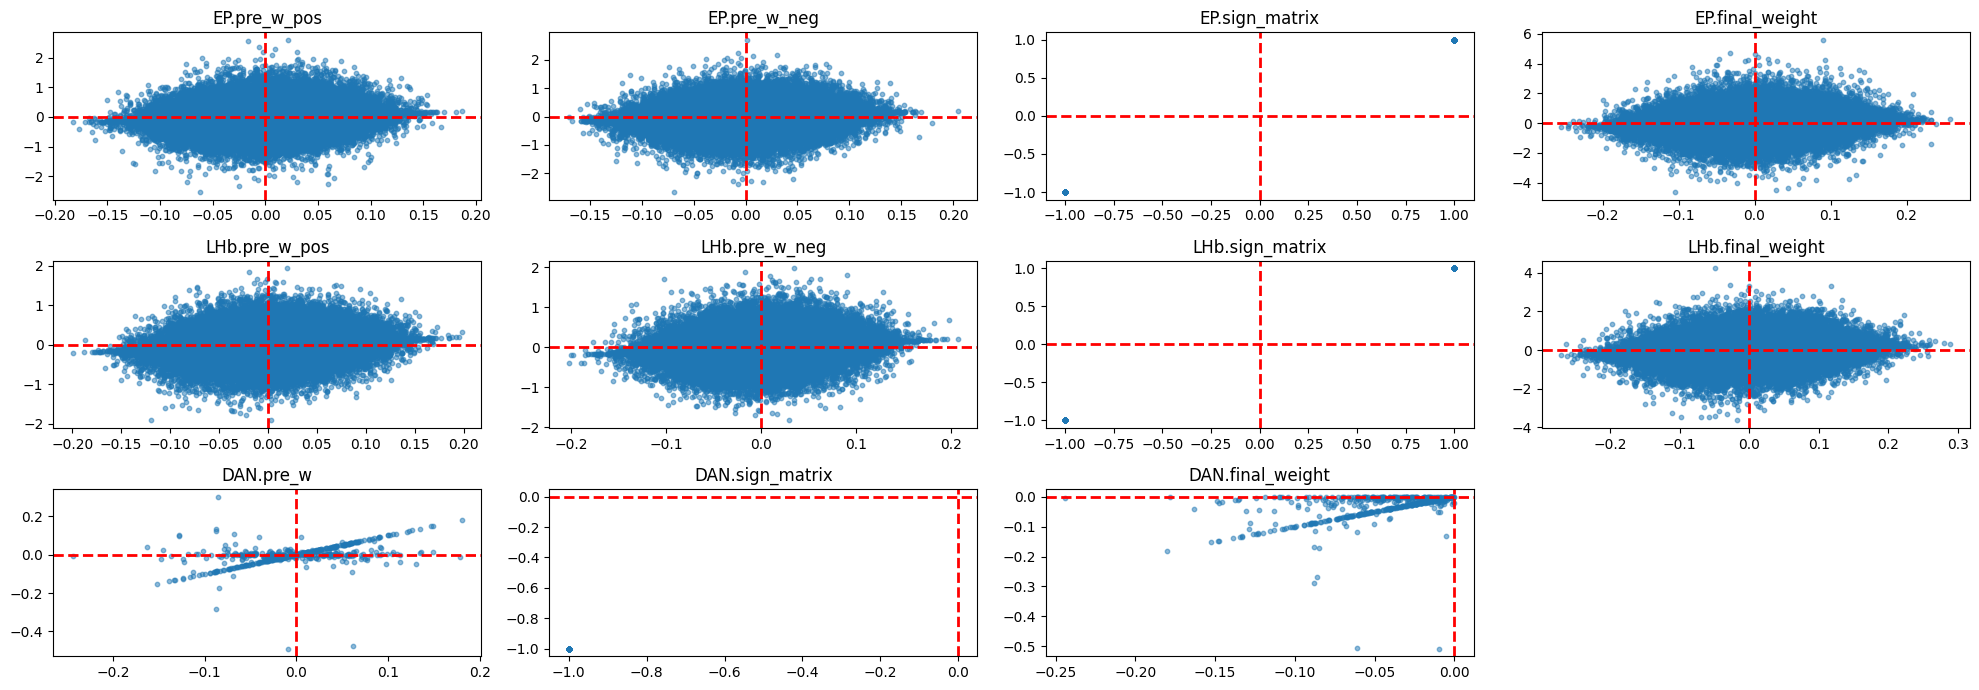

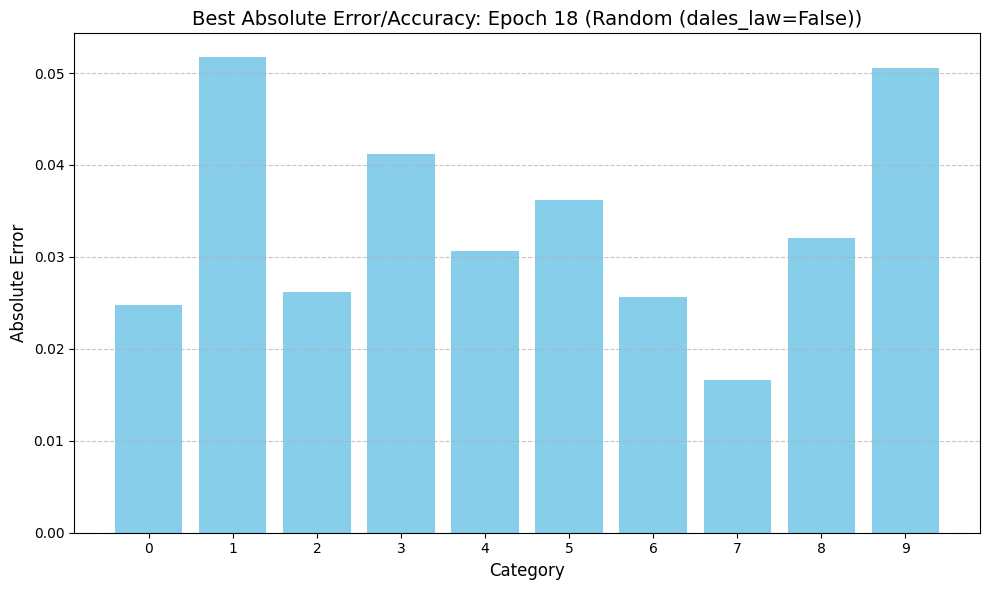

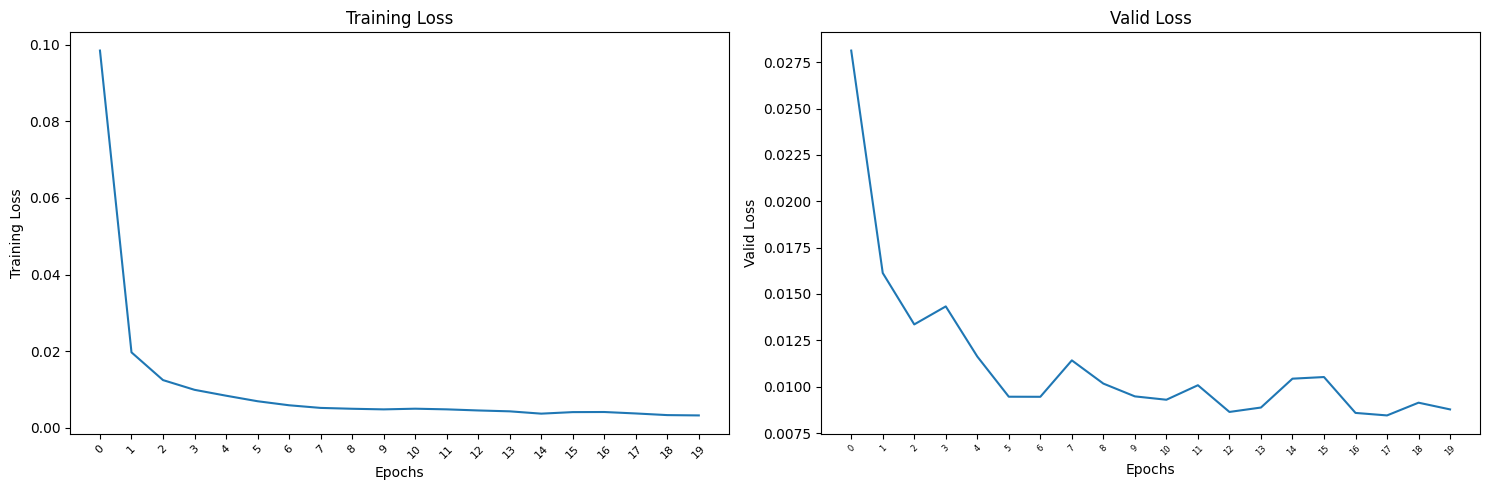

EP.pre_w_pos: Positive: 49.90%; Negative: 50.10%; Zero: 0.00%
EP.pre_w_neg: Positive: 50.01%; Negative: 49.99%; Zero: 0.00%
EP.sign_matrix: Positive: 49.93%; Negative: 50.07%; Zero: 0.00%
EP.final_weight: Positive: 49.91%; Negative: 50.09%; Zero: 0.00%
LHb.pre_w_pos: Positive: 50.04%; Negative: 49.96%; Zero: 0.00%
LHb.pre_w_neg: Positive: 50.03%; Negative: 49.97%; Zero: 0.00%
LHb.sign_matrix: Positive: 50.12%; Negative: 49.88%; Zero: 0.00%
LHb.final_weight: Positive: 50.04%; Negative: 49.96%; Zero: 0.00%
DAN.pre_w: Positive: 50.78%; Negative: 49.22%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 3.31 s | predicted time remaining: 62.91 s
 ----   Epoch 2  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 6.08 s | predicted time remaining: 54.72 s
 ----   Epoch 3  ---- 
training loss: 0.00 | validat

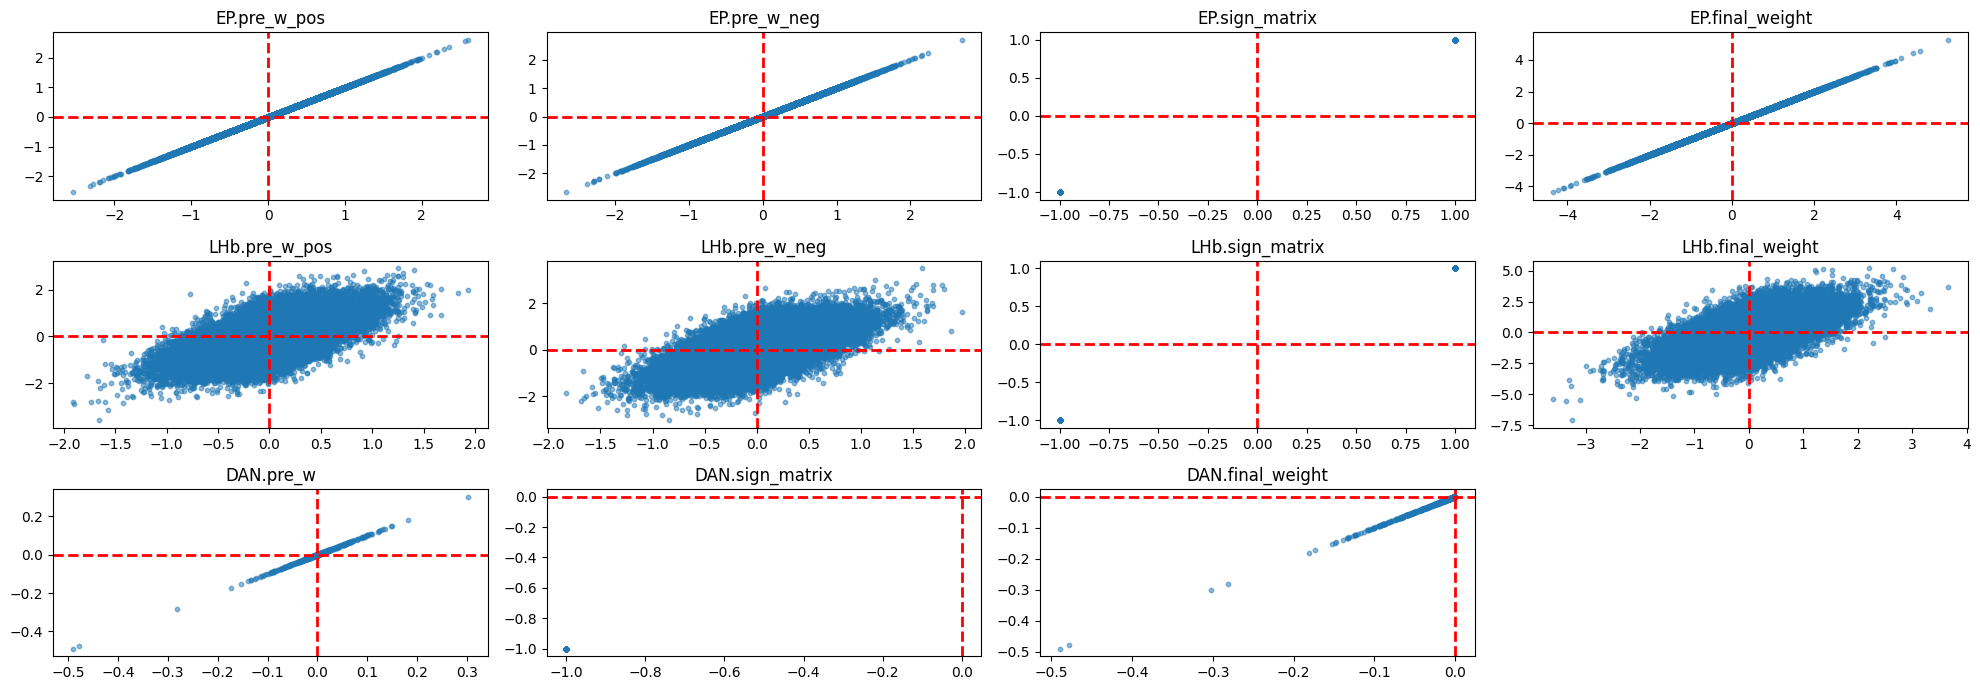

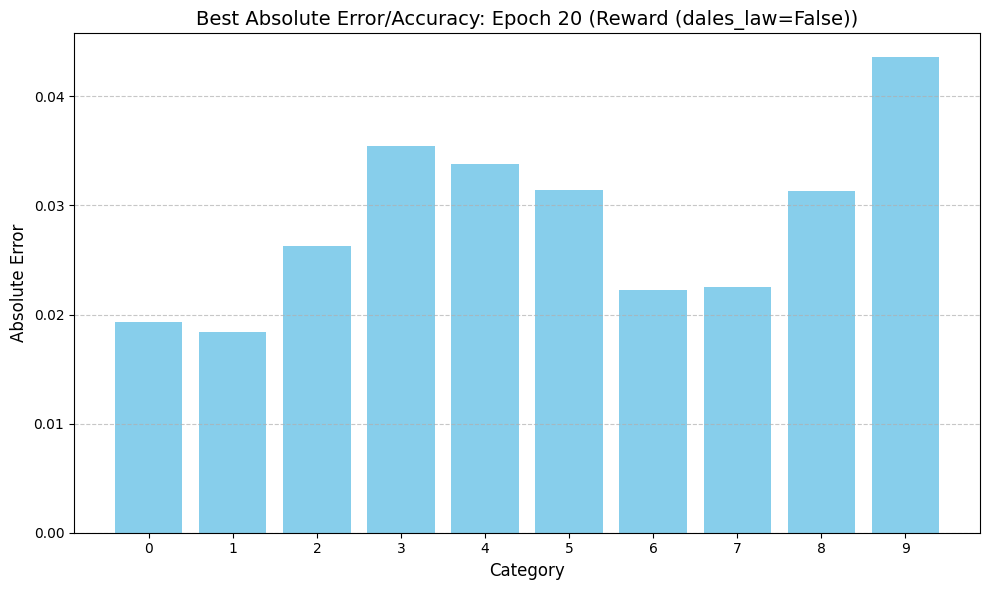

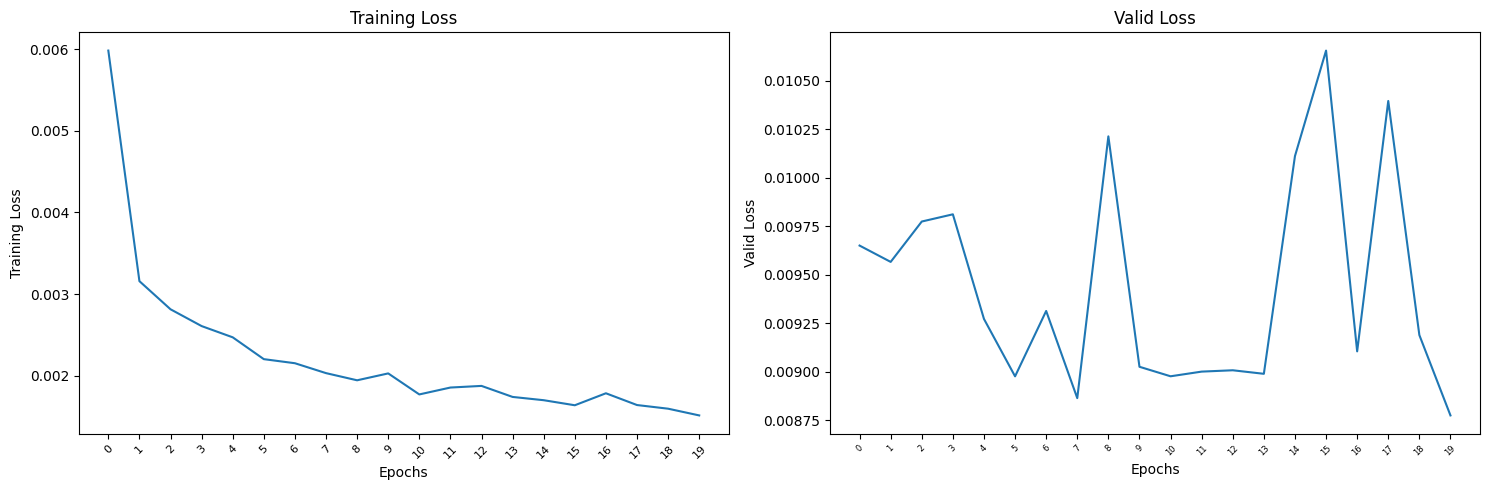

EP.pre_w_pos: Positive: 49.90%; Negative: 50.10%; Zero: 0.00%
EP.pre_w_neg: Positive: 50.01%; Negative: 49.99%; Zero: 0.00%
EP.sign_matrix: Positive: 49.93%; Negative: 50.07%; Zero: 0.00%
EP.final_weight: Positive: 49.91%; Negative: 50.09%; Zero: 0.00%
LHb.pre_w_pos: Positive: 49.80%; Negative: 50.20%; Zero: 0.00%
LHb.pre_w_neg: Positive: 50.26%; Negative: 49.74%; Zero: 0.00%
LHb.sign_matrix: Positive: 50.12%; Negative: 49.88%; Zero: 0.00%
LHb.final_weight: Positive: 49.66%; Negative: 50.34%; Zero: 0.00%
DAN.pre_w: Positive: 50.78%; Negative: 49.22%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 10.58 s | predicted time remaining: 201.03 s
 ----   Epoch 2  ---- 
training loss: 0.00 | validation loss: 0.01
time elapsed: 15.37 s | predicted time remaining: 138.29 s
 ----   Epoch 3  ---- 
training loss: 0.00 | val

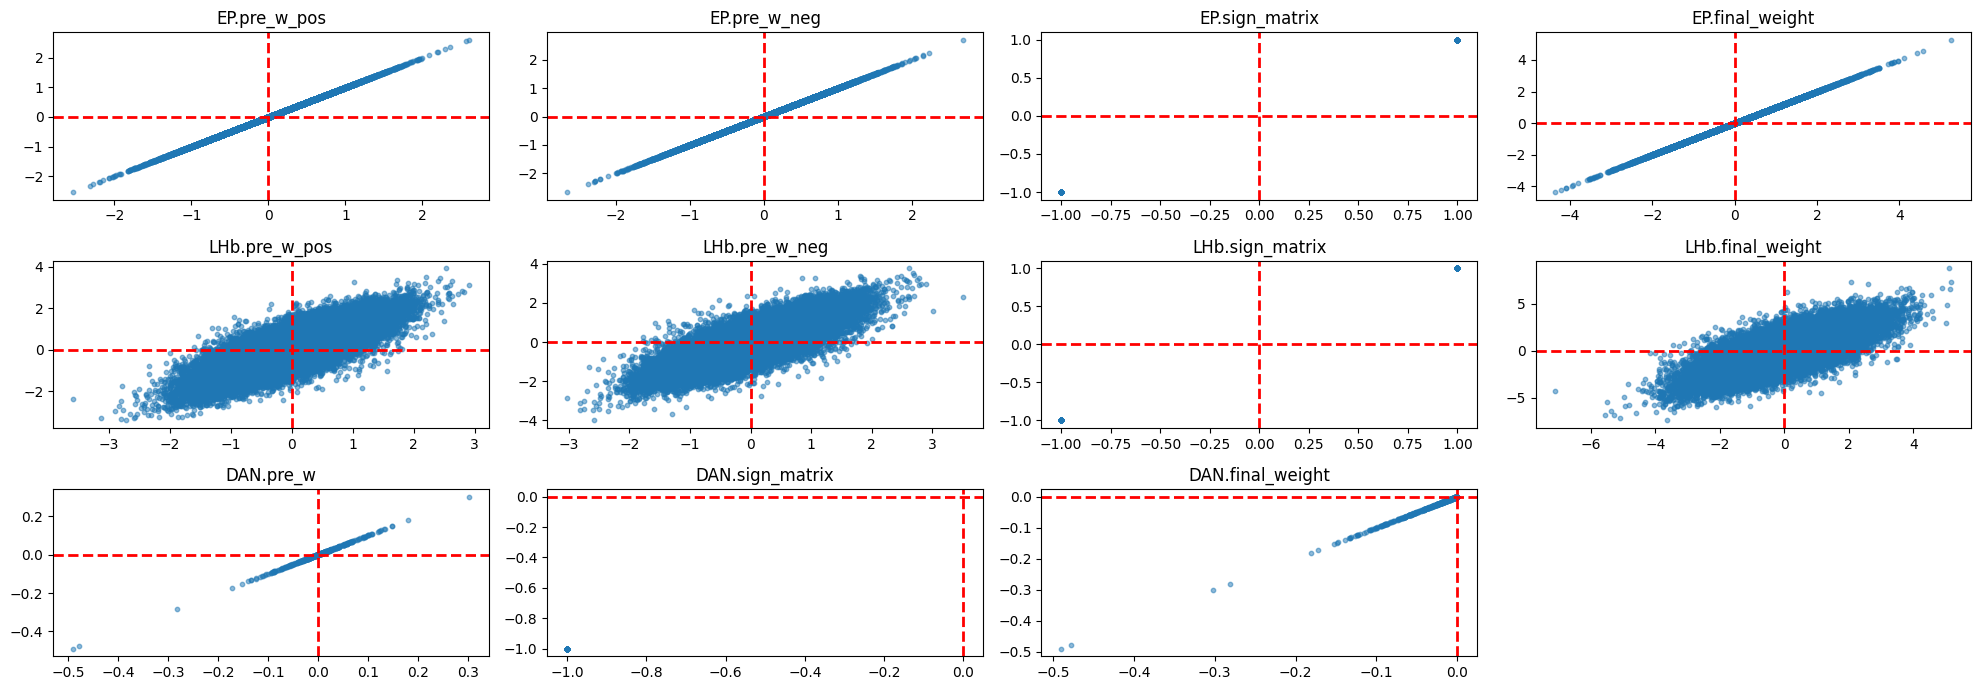

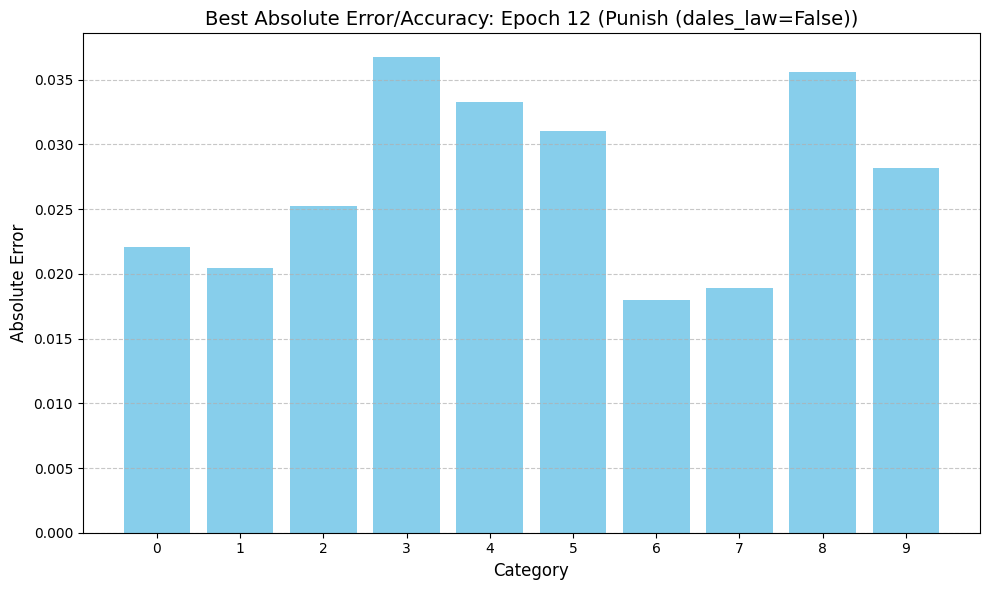

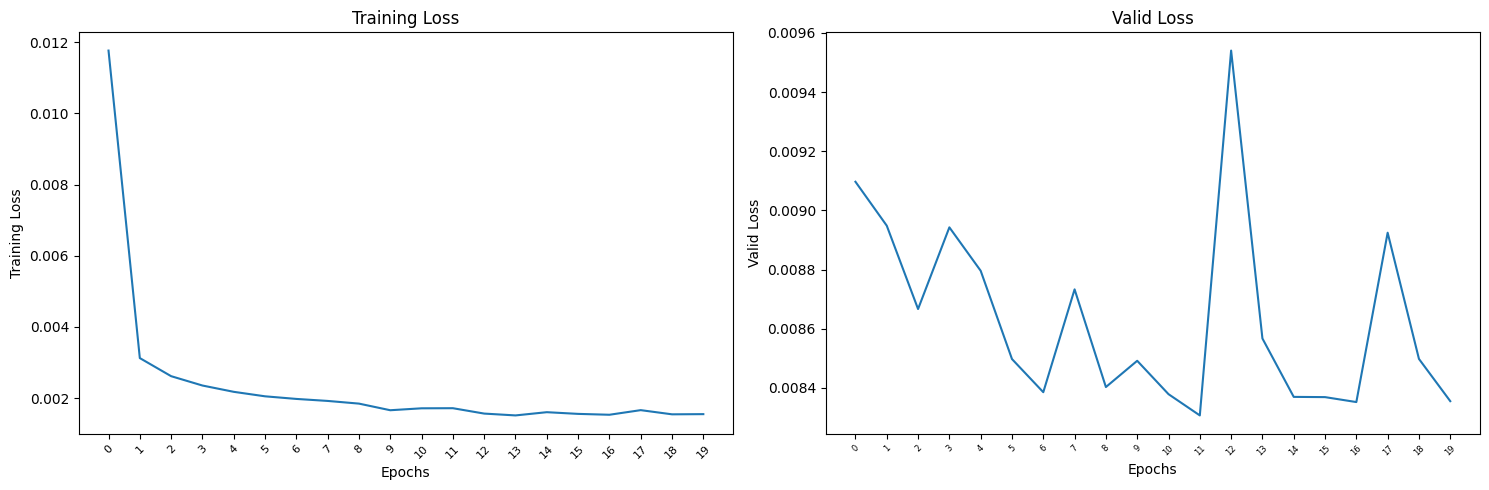

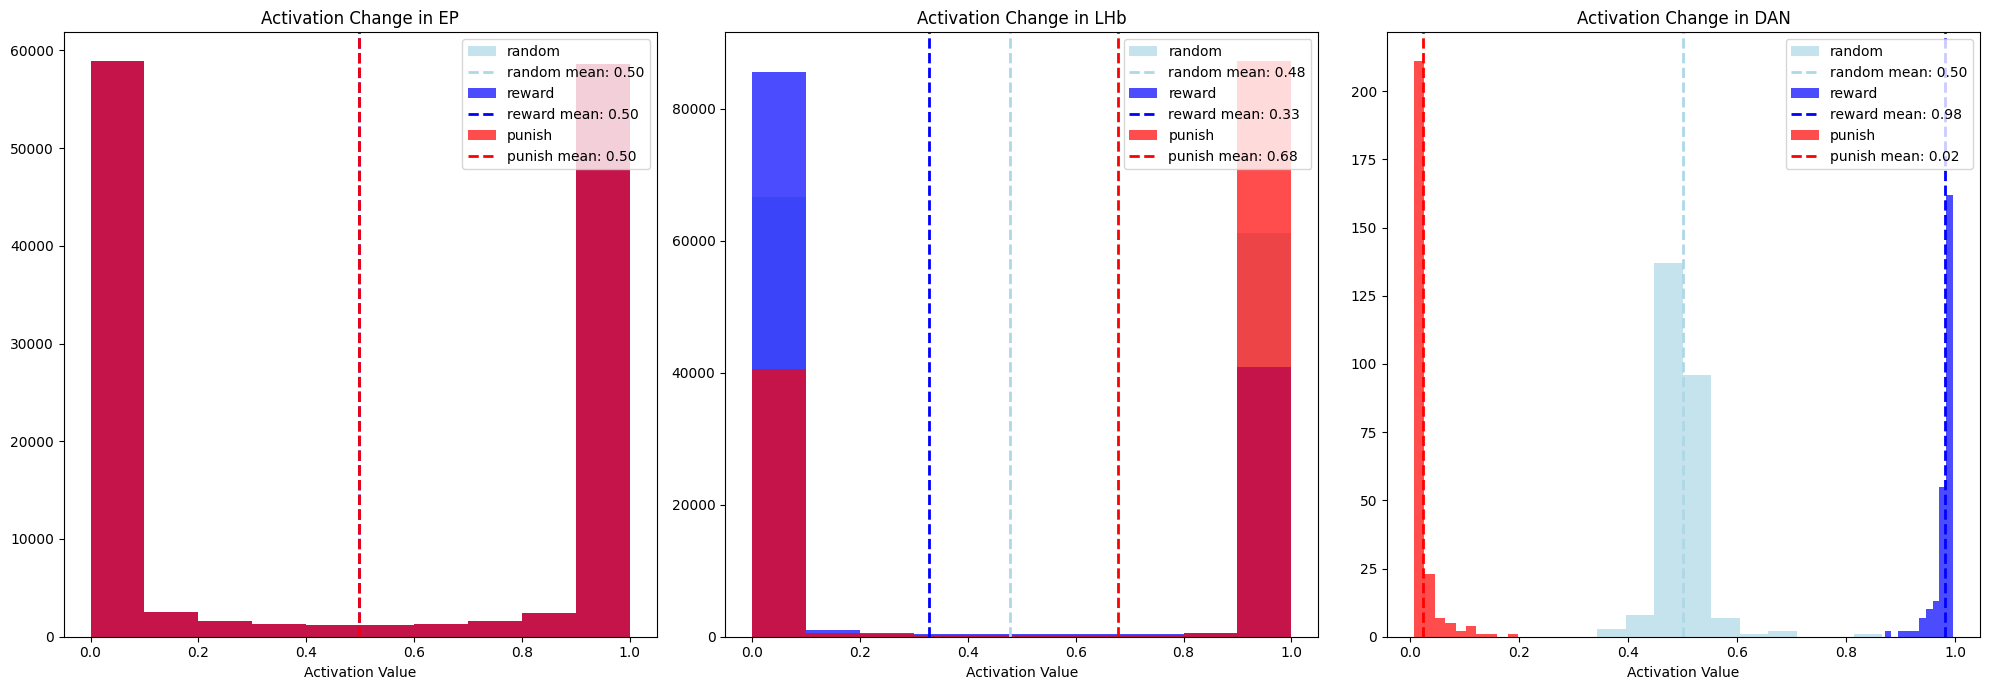

MNIST_TopK_MSE_dalesFalse_1
Updatable weights: 1


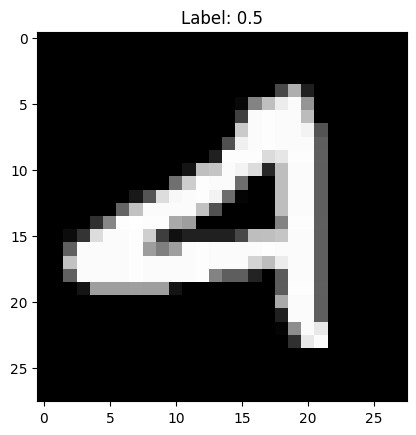

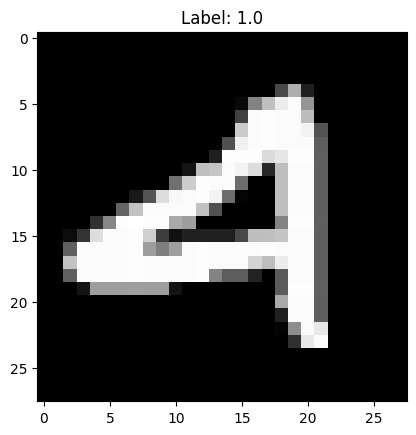

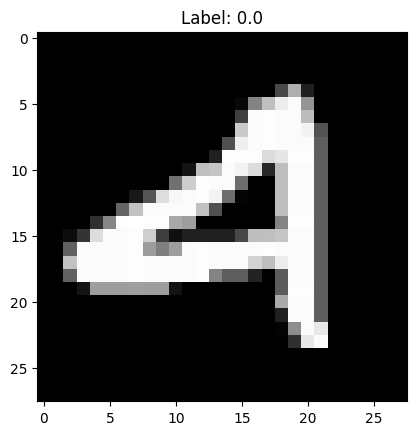

EP.pre_w_pos: Positive: 50.11%; Negative: 49.89%; Zero: 0.00%
EP.pre_w_neg: Positive: 49.94%; Negative: 50.06%; Zero: 0.00%
EP.sign_matrix: Positive: 50.11%; Negative: 49.89%; Zero: 0.00%
EP.final_weight: Positive: 50.05%; Negative: 49.95%; Zero: 0.00%
LHb.pre_w_pos: Positive: 50.00%; Negative: 50.00%; Zero: 0.00%
LHb.pre_w_neg: Positive: 50.15%; Negative: 49.85%; Zero: 0.00%
LHb.sign_matrix: Positive: 49.88%; Negative: 50.12%; Zero: 0.00%
LHb.final_weight: Positive: 49.97%; Negative: 50.03%; Zero: 0.00%
DAN.pre_w: Positive: 50.39%; Negative: 49.61%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.11 | validation loss: 0.03
time elapsed: 3.86 s | predicted time remaining: 73.26 s
 ----   Epoch 2  ---- 
training loss: 0.02 | validation loss: 0.02
time elapsed: 7.36 s | predicted time remaining: 66.26 s
 ----   Epoch 3  ---- 
training loss: 0.01 | validat

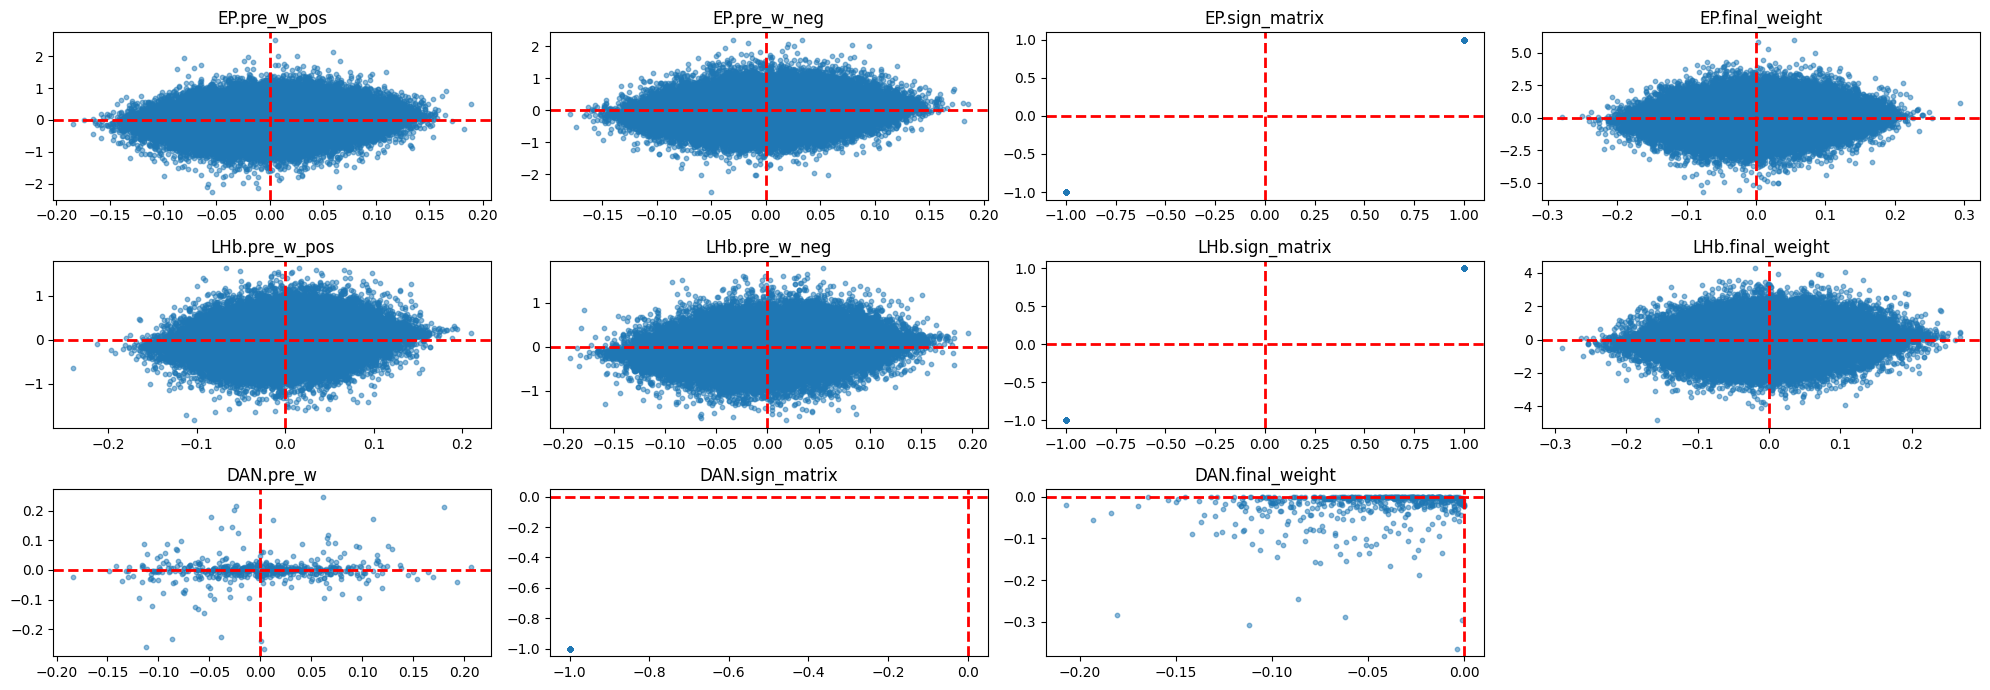

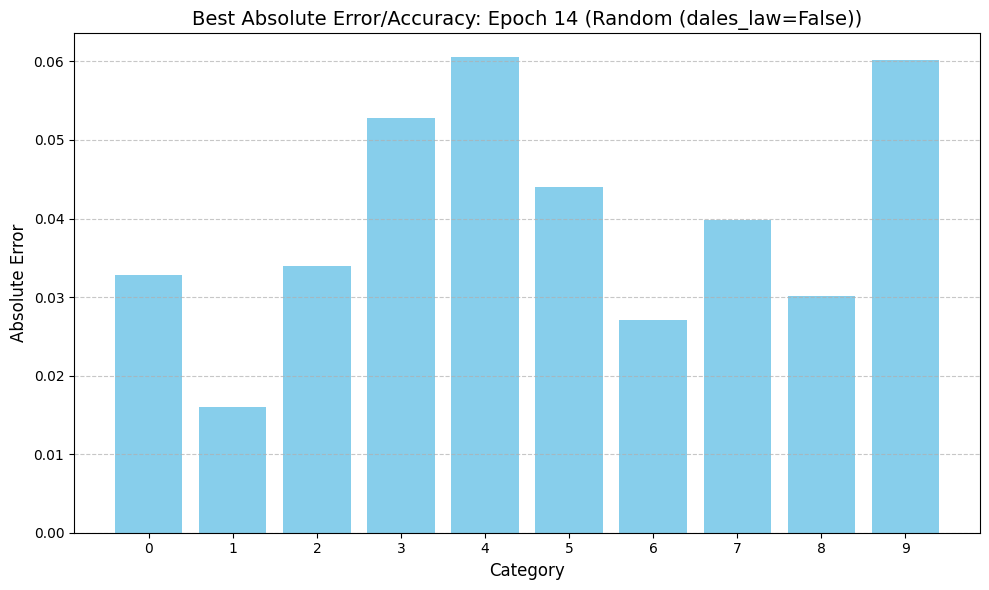

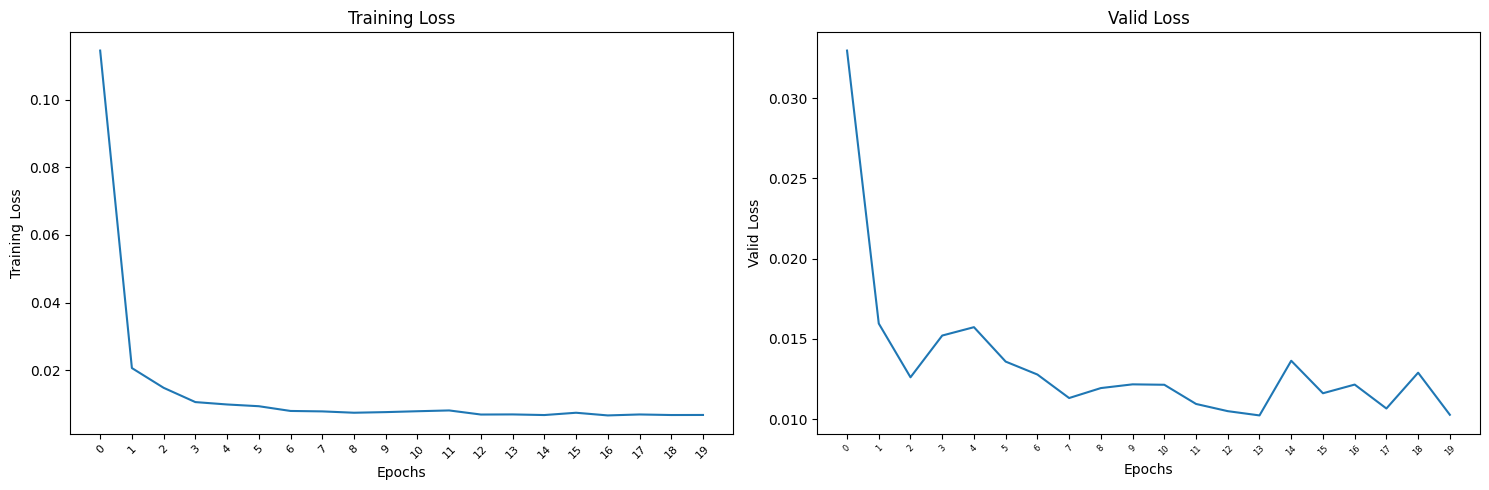

EP.pre_w_pos: Positive: 50.19%; Negative: 49.81%; Zero: 0.00%
EP.pre_w_neg: Positive: 49.84%; Negative: 50.16%; Zero: 0.00%
EP.sign_matrix: Positive: 50.11%; Negative: 49.89%; Zero: 0.00%
EP.final_weight: Positive: 50.16%; Negative: 49.84%; Zero: 0.00%
LHb.pre_w_pos: Positive: 50.52%; Negative: 49.48%; Zero: 0.00%
LHb.pre_w_neg: Positive: 49.43%; Negative: 50.57%; Zero: 0.00%
LHb.sign_matrix: Positive: 49.88%; Negative: 50.12%; Zero: 0.00%
LHb.final_weight: Positive: 50.61%; Negative: 49.39%; Zero: 0.00%
DAN.pre_w: Positive: 49.41%; Negative: 50.59%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 3.84 s | predicted time remaining: 72.91 s
 ----   Epoch 2  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 6.90 s | predicted time remaining: 62.09 s
 ----   Epoch 3  ---- 
training loss: 0.01 | validat

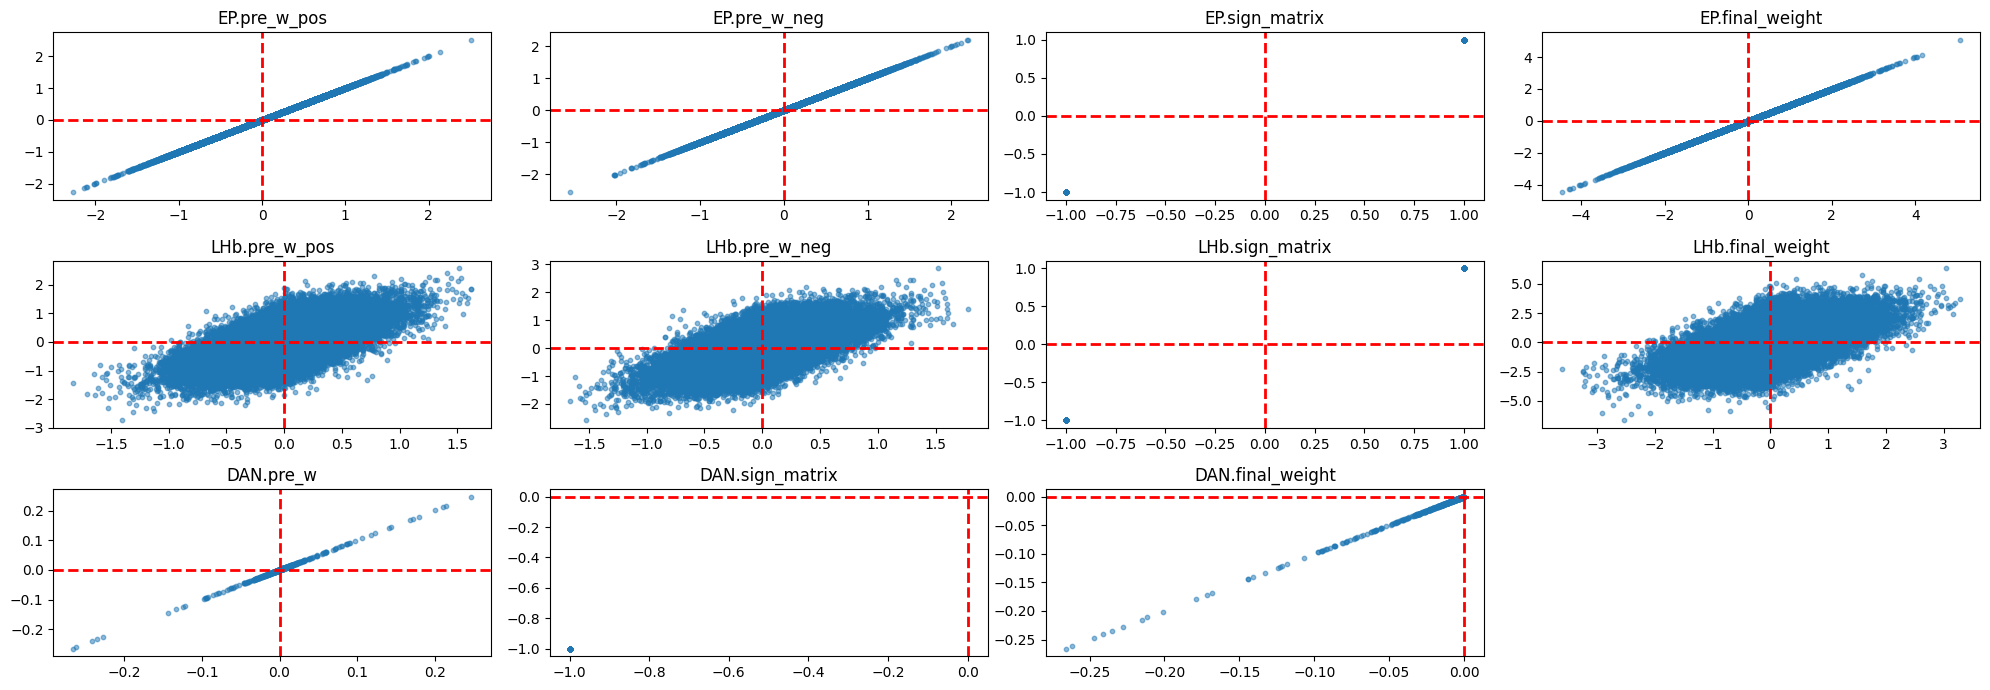

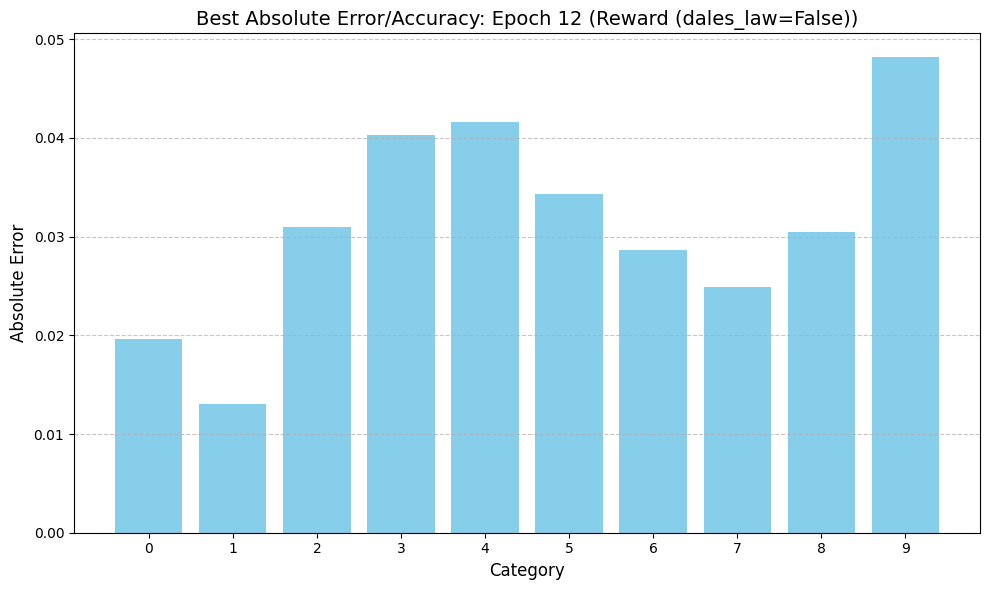

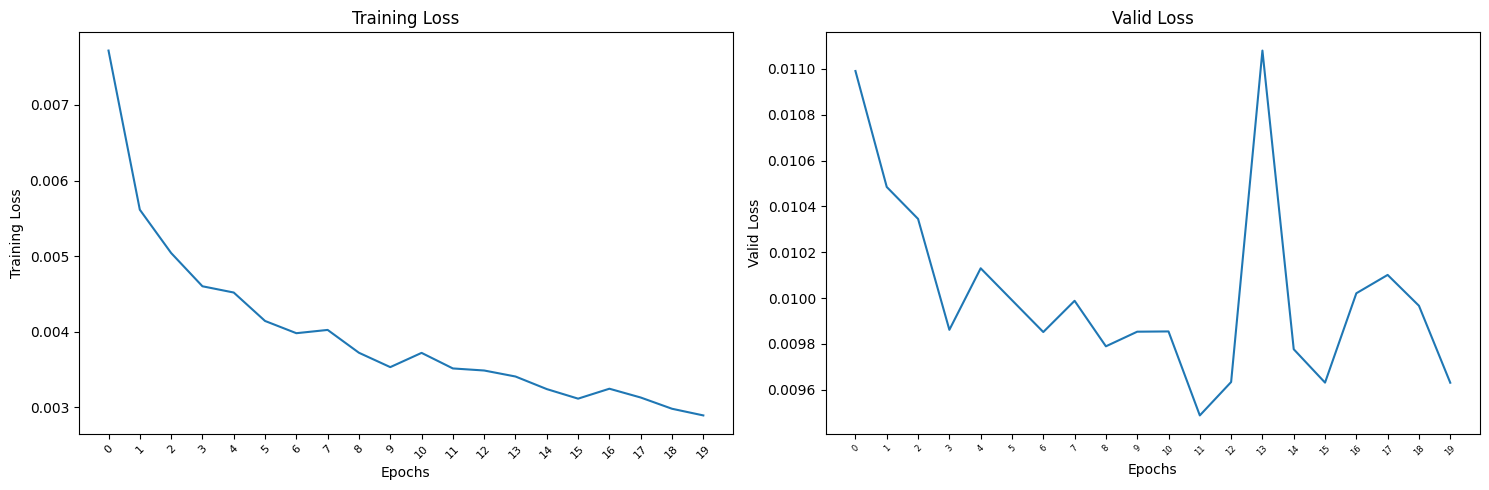

EP.pre_w_pos: Positive: 50.19%; Negative: 49.81%; Zero: 0.00%
EP.pre_w_neg: Positive: 49.84%; Negative: 50.16%; Zero: 0.00%
EP.sign_matrix: Positive: 50.11%; Negative: 49.89%; Zero: 0.00%
EP.final_weight: Positive: 50.16%; Negative: 49.84%; Zero: 0.00%
LHb.pre_w_pos: Positive: 50.69%; Negative: 49.31%; Zero: 0.00%
LHb.pre_w_neg: Positive: 49.35%; Negative: 50.65%; Zero: 0.00%
LHb.sign_matrix: Positive: 49.88%; Negative: 50.12%; Zero: 0.00%
LHb.final_weight: Positive: 50.69%; Negative: 49.31%; Zero: 0.00%
DAN.pre_w: Positive: 49.41%; Negative: 50.59%; Zero: 0.00%
DAN.sign_matrix: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
DAN.final_weight: Positive: 0.00%; Negative: 100.00%; Zero: 0.00%
 ----   Epoch 1  ---- 
training loss: 0.02 | validation loss: 0.01
time elapsed: 4.87 s | predicted time remaining: 92.49 s
 ----   Epoch 2  ---- 
training loss: 0.01 | validation loss: 0.01
time elapsed: 9.35 s | predicted time remaining: 84.16 s
 ----   Epoch 3  ---- 
training loss: 0.00 | validat

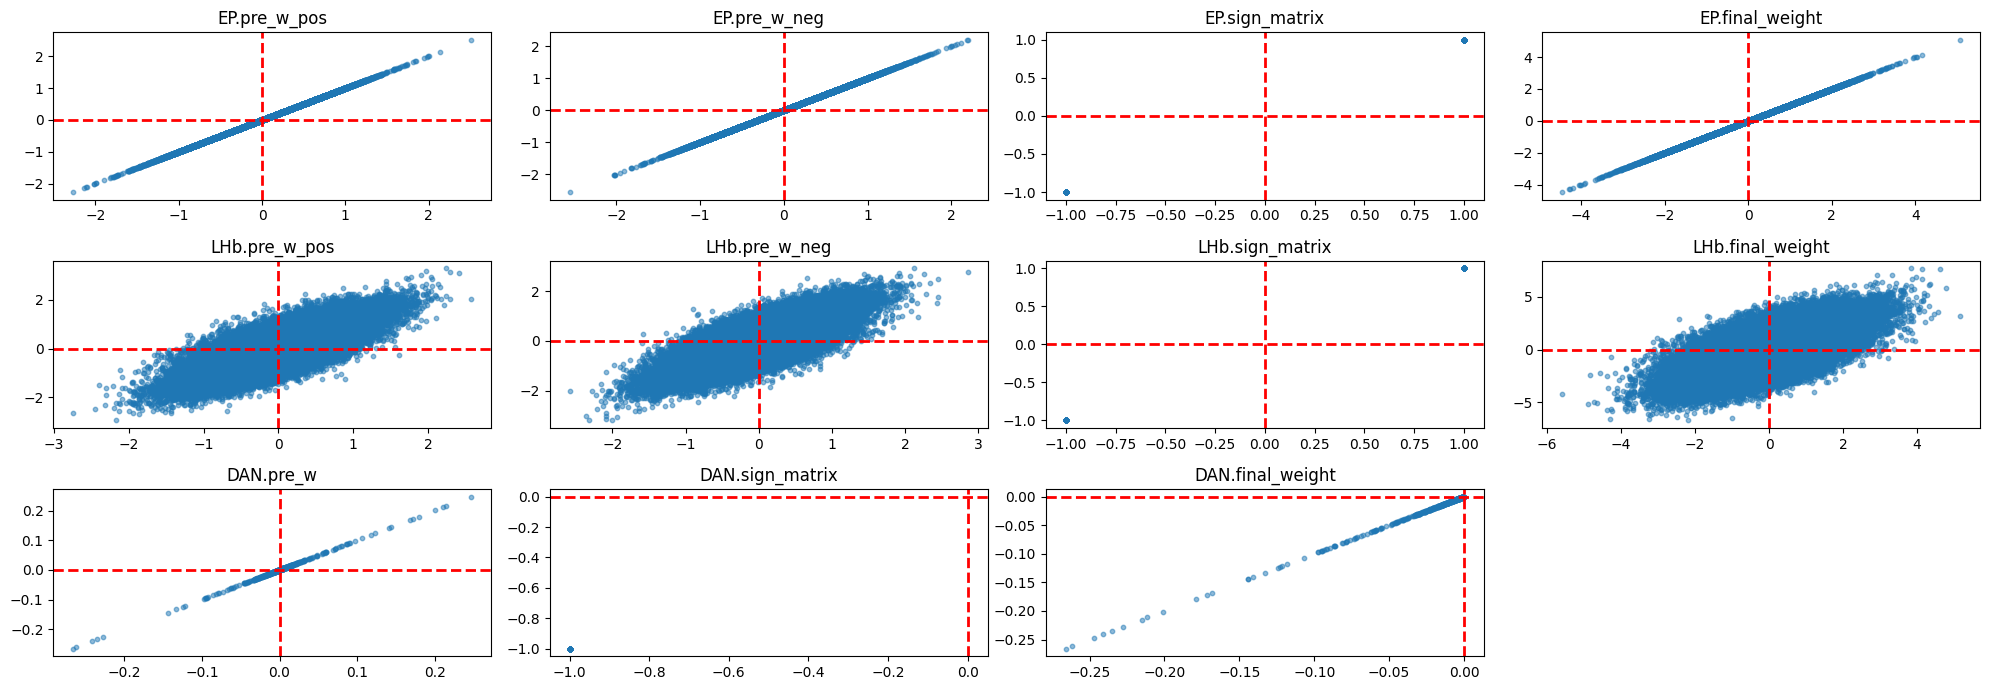

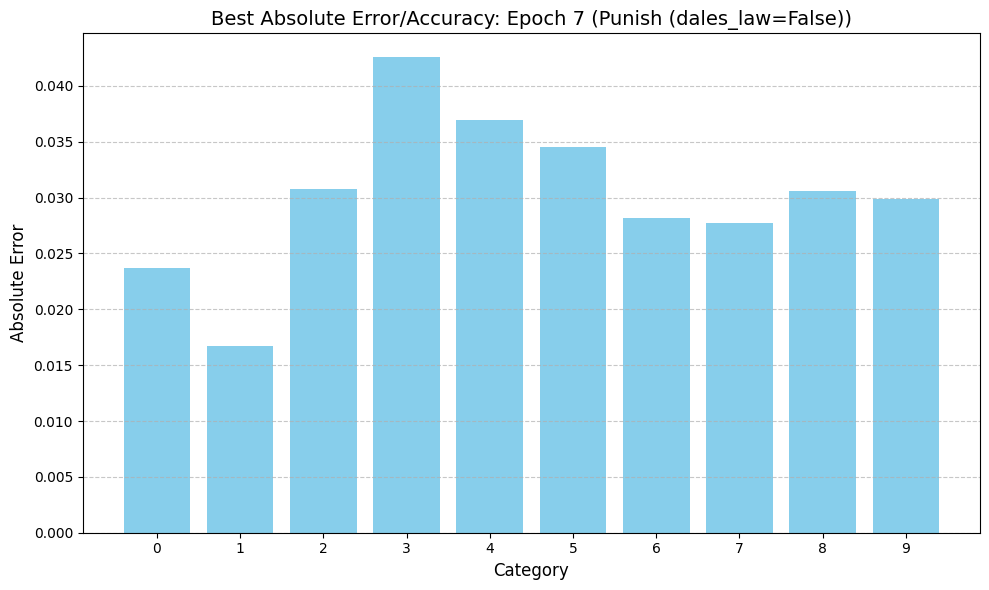

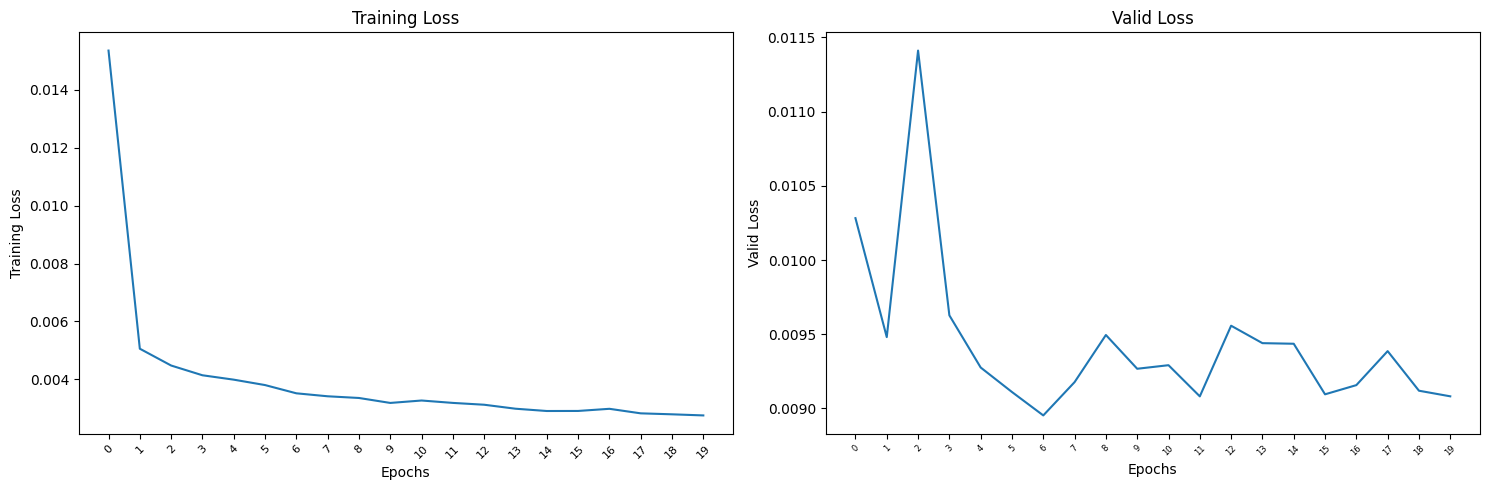

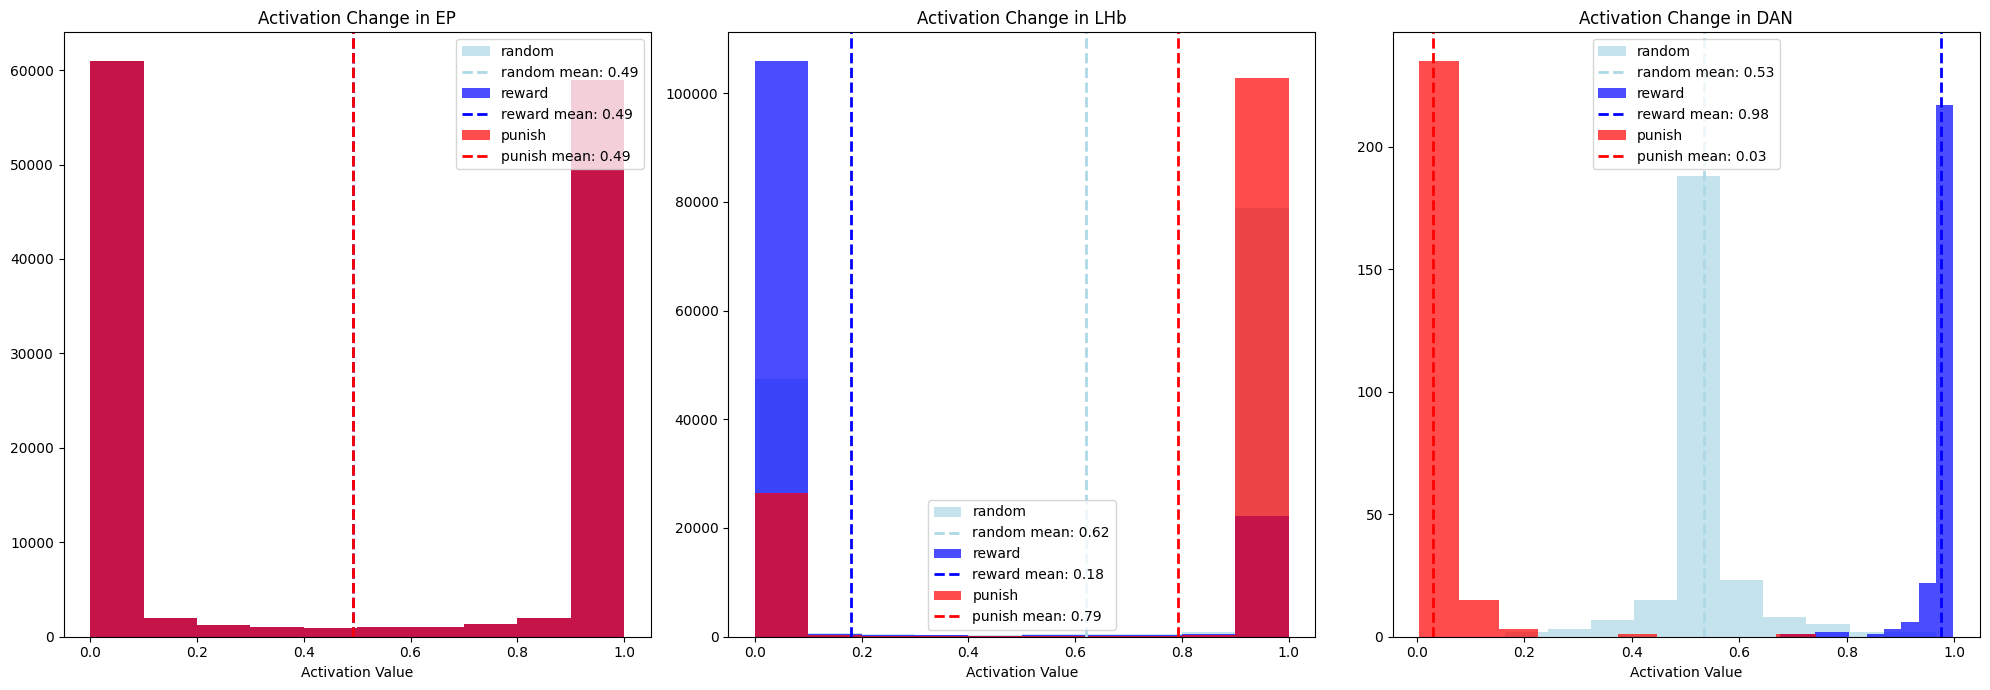

In [2]:
epochs = 20
opto_category = 4
out_features = 1
lr = 0.01
plot = True
TrainerMLE.suppress = not plot

# updatable_weights_ls = [0.00001, 0.00005, 0.0001, 0.0002, 0.0005, 0.001]
updatable_weights_ls = [0.5, 1]
#updatable_weights_ls = [0, 0.0001, 0.0005] + np.arange(0.001, 0.1, 0.001).tolist() # 102 len list

# Initialize data structures organized by dales_law condition
dales_law_values = [True, False]
training_loss_summary, test_accuracy_summary, val_accuracy_summary, initial_params_summary, trained_params_summary, params_summary = {}, {}, {}, {}, {}, {}

# Organize data by dales_law, then by training phase (random, reward, punish)
# Structure: {dales_law: {phase: [values across updatable_weights]}}
min_train_loss_by_dales = {True: {'random': [], 'reward': [], 'punish': []}, 
                           False: {'random': [], 'reward': [], 'punish': []}}
opto_abs_distance_by_dales = {True: {'random': [], 'reward': [], 'punish': []}, 
                               False: {'random': [], 'reward': [], 'punish': []}}
mean_DAN_activations_by_dales = {True: {'random': [], 'reward': [], 'punish': []}, 
                                  False: {'random': [], 'reward': [], 'punish': []}}

# Outer loop: iterate through dales_law values
for dales_law in dales_law_values:
    print(f"\n{'='*60}")
    print(f"Running with dales_law = {dales_law}")
    print(f"{'='*60}\n")
    
    # Inner loop: iterate through updatable_weights values
    for trial_num in range(len(updatable_weights_ls)):
    
        network_name = f'MNIST_TopK_MSE_dales{dales_law}_{trial_num}'
        print(network_name)
        print("Updatable weights:", updatable_weights_ls[trial_num])

        # Training sessions
        random_learning = True # always true
        reward_learning = True
        punish_learning = True

        model = Corelease_Model(in_features=784, h1=512, h2=512, out_features=1, dales_law=dales_law)

        optimizer = CustomAdam(model=model, params=model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, amsgrad=False, updatable_weights=updatable_weights_ls[trial_num], mask_dict=None)

        loss_function = "MSE"

        if loss_function == "CrossEntropy":
            criterion = nn.CrossEntropyLoss()
        elif loss_function == "MSE":
            criterion = nn.MSELoss()

        train_data = datasets.MNIST(root='./data', train=True,
                            transform=transforms.ToTensor(), download=True)

        random_train_data = MNIST(train_data, out_features=out_features)
        reward_train_data = MNIST(train_data, out_features=out_features, opto_category=opto_category, opto_target=1)
        punish_train_data = MNIST(train_data, out_features=out_features, opto_category=opto_category, opto_target=0)

        random_train_data, random_valid_data = random_split(random_train_data, [50000, 10000], generator=torch.Generator().manual_seed(42))
        reward_train_data, reward_valid_data = random_split(reward_train_data, [50000, 10000], generator=torch.Generator().manual_seed(42))
        punish_train_data, punish_valid_data = random_split(punish_train_data, [50000, 10000], generator=torch.Generator().manual_seed(42))

        random_train_loader = DataLoader(random_train_data, 
                                          batch_size=256, 
                                          shuffle=False)
        reward_train_loader = DataLoader(reward_train_data, 
                                            batch_size=256, 
                                            shuffle=False)
        punish_train_loader = DataLoader(punish_train_data, 
                                            batch_size=256, 
                                            shuffle=False)

        # Get opto loader
        random_opto_loader = generate_opto_loader(random_train_loader, opto_category, plot=plot)
        reward_opto_loader = generate_opto_loader(reward_train_loader, opto_category, plot=plot)
        punish_opto_loader = generate_opto_loader(punish_train_loader, opto_category, plot=plot)

        if random_learning:
            # record initial params
            initial_params = model.record_params().copy()
            initial_params_summary[network_name] = [initial_params.copy()]

            # random train
            random_results = TrainerMLE(optimizer=optimizer).train(model, random_train_data, random_valid_data, criterion, opto_category, epochs=epochs)

            # record trained params
            trained_params = model.record_params().copy()
            trained_params_summary[network_name] = [trained_params.copy()]

            # weight plot
            weight_changes(initial_params, trained_params) if plot else None

            # store random activations
            random_activations = get_activations(model, random_opto_loader)
            
            # random accuracy/loss - collect data organized by dales_law and phase
            temp_opto_abs = []
            temp_min_loss = []
            temp_opto_abs = plot_distance(random_results, f"Random (dales_law={dales_law})", plot, temp_opto_abs, opto_category=opto_category)
            temp_min_loss = plot_loss(random_results, plot, temp_min_loss)
            
            opto_abs_distance_by_dales[dales_law]['random'].append(temp_opto_abs[0] if temp_opto_abs else None)
            min_train_loss_by_dales[dales_law]['random'].append(temp_min_loss[0] if temp_min_loss else None)

        # Before reward/punish training, freeze all layers except LHb
        params_to_optimize = [model.LHb.pre_w] if dales_law == True else [model.LHb.pre_w_pos, model.LHb.pre_w_neg]

        # update adam optimizer
        previous_mask_dict = optimizer.mask_dict
        optimizer = CustomAdam(model=model, params=params_to_optimize, lr=lr, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, amsgrad=False, updatable_weights=updatable_weights_ls[trial_num], mask_dict=previous_mask_dict)

        if reward_learning:
            # record initial params
            initial_params = model.record_params().copy()
            initial_params_summary[network_name].append(initial_params.copy())

            # reward train
            reward_results = TrainerMLE(optimizer=optimizer).train(model, reward_train_data, reward_valid_data, criterion, opto_category, epochs=epochs)

            # record trained params
            trained_params = model.record_params().copy()
            trained_params_summary[network_name].append(trained_params.copy())

            # weight plot
            weight_changes(initial_params, trained_params) if plot else None

            # store reward activations
            reward_activations = get_activations(model, reward_opto_loader)
            
            # reward accuracy/loss - collect data organized by dales_law and phase
            temp_opto_abs = []
            temp_min_loss = []
            temp_opto_abs = plot_distance(reward_results, f"Reward (dales_law={dales_law})", plot, temp_opto_abs, opto_category=opto_category)
            temp_min_loss = plot_loss(reward_results, plot, temp_min_loss)
            
            opto_abs_distance_by_dales[dales_law]['reward'].append(temp_opto_abs[0] if temp_opto_abs else None)
            min_train_loss_by_dales[dales_law]['reward'].append(temp_min_loss[0] if temp_min_loss else None)

        if punish_learning: 
            # record initial params
            initial_params = model.record_params().copy()
            initial_params_summary[network_name].append(initial_params.copy())

            # punish train
            punish_results = TrainerMLE(optimizer=optimizer).train(model, punish_train_data, punish_valid_data, criterion, opto_category, epochs=epochs)

            # record trained params
            trained_params = model.record_params().copy()
            trained_params_summary[network_name].append(trained_params.copy())

            # weight plot
            weight_changes(initial_params, trained_params) if plot else None

            # store punish activations
            punish_activations = get_activations(model, punish_opto_loader)
            
            # punish accuracy/loss - collect data organized by dales_law and phase
            temp_opto_abs = []
            temp_min_loss = []
            temp_opto_abs = plot_distance(punish_results, f"Punish (dales_law={dales_law})", plot, temp_opto_abs, opto_category=opto_category)
            temp_min_loss = plot_loss(punish_results, plot, temp_min_loss)
            
            opto_abs_distance_by_dales[dales_law]['punish'].append(temp_opto_abs[0] if temp_opto_abs else None)
            min_train_loss_by_dales[dales_law]['punish'].append(temp_min_loss[0] if temp_min_loss else None)

        # Plot activation values for opto category
        activations = []
        if random_learning: activations.append(random_activations)
        if reward_learning: activations.append(reward_activations)
        if punish_learning: activations.append(punish_activations)

        # Collect DAN activations organized by dales_law and phase
        temp_mean_DAN = []
        temp_mean_DAN = plot_layer_activation(activations, plot=[random_learning, reward_learning, punish_learning], mean_DAN_activations=temp_mean_DAN)
        
        # Append to organized structure (assuming 3 values: random, reward, punish)
        if len(temp_mean_DAN) >= 3:
            mean_DAN_activations_by_dales[dales_law]['random'].append(temp_mean_DAN[0])
            mean_DAN_activations_by_dales[dales_law]['reward'].append(temp_mean_DAN[1])
            mean_DAN_activations_by_dales[dales_law]['punish'].append(temp_mean_DAN[2])
        elif len(temp_mean_DAN) == 1 and random_learning:
            # Only random learning
            mean_DAN_activations_by_dales[dales_law]['random'].append(temp_mean_DAN[0])


    # Package into pickle file
    # packed = {"top_act_neurons": model.opto_choose_neuron, "bottom_act_neurons": model.lowest_choose_neuron}

    # packed["random_train_initial_params"] = random_train_initial_params
    # packed["random_train_trained_params"] = random_train_trained_params
    # train_name = "random"

    # if reward_learning:
    #     packed["reward_train_initial_params"] = reward_train_initial_params
    #     packed["reward_train_trained_params"] = reward_train_trained_params
    #     train_name += "-reward"

    # if punish_learning:
    #     packed["punish_train_initial_params"] = punish_train_initial_params
    #     packed["punish_train_trained_params"] = punish_train_trained_params
    #     train_name += "-punish"

    # # Save the list as a pickle file
    # print(f'Saving weights to FMNIST_weights_{train_name}.pkl')
    # with open(f'FMNIST_weights_{train_name}.pkl', 'wb') as f:
    #     pickle.dump(packed, f)


In [ ]:
def updatable_weights_plot(updatable_weights_ls, min_train_loss_by_dales, opto_abs_distance_by_dales, mean_DAN_activations_by_dales):
    """
    Plot updatable weights (x axis) vs training metrics in a 3x3 grid.
    Rows: lowest training loss, absolute distance, mean DAN activation
    Columns: random, reward, punish
    
    Parameters
    ----------
    updatable_weights_ls : list
        List of updatable weights values.
    min_train_loss_by_dales : dict
        Dictionary with structure {dales_law: {phase: [values]}}
    opto_abs_distance_by_dales : dict
        Dictionary with structure {dales_law: {phase: [values]}}
    mean_DAN_activations_by_dales : dict
        Dictionary with structure {dales_law: {phase: [values]}}
    """
    updatable_weights_ls = [x * 100 for x in updatable_weights_ls]
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 15), sharex='col', sharey='row')
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    
    phases = ['random', 'reward', 'punish']
    phase_labels = ['Random', 'Reward', 'Punish']
    phase_colors = {'random': 'lightblue', 'reward': 'blue', 'punish': 'red'}
    dales_labels = {True: "Dale's Law", False: 'Co-release'}
    dales_styles = {True: '-', False: '--'}
    
    # Row 0: Lowest Training Loss
    row_idx = 0
    for col_idx, (phase, phase_label) in enumerate(zip(phases, phase_labels)):
        ax = axs[row_idx, col_idx]
        for dales_law in [True, False]:
            if phase in min_train_loss_by_dales[dales_law] and len(min_train_loss_by_dales[dales_law][phase]) > 0:
                ax.plot(updatable_weights_ls, min_train_loss_by_dales[dales_law][phase], 
                       label=dales_labels[dales_law], color=phase_colors[phase], 
                       linestyle=dales_styles[dales_law], linewidth=2, marker='o')
        ax.set_title(f"Lowest Training Loss - {phase_label}")
        if col_idx == 0:
            ax.set_ylabel("Lowest Training Loss")
        if row_idx == 2:
            ax.set_xlabel("Updatable Weights (%)")
        ax.set_xticks(updatable_weights_ls)
        ax.ticklabel_format(style='plain', axis='x')
        ax.tick_params(axis='x', rotation=45, labelsize=9)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
    
    # Row 1: Opto Absolute Distance
    row_idx = 1
    for col_idx, (phase, phase_label) in enumerate(zip(phases, phase_labels)):
        ax = axs[row_idx, col_idx]
        for dales_law in [True, False]:
            if phase in opto_abs_distance_by_dales[dales_law] and len(opto_abs_distance_by_dales[dales_law][phase]) > 0:
                ax.plot(updatable_weights_ls, opto_abs_distance_by_dales[dales_law][phase], 
                       label=dales_labels[dales_law], color=phase_colors[phase], 
                       linestyle=dales_styles[dales_law], linewidth=2, marker='o')
        ax.set_title(f"Opto Absolute Distance - {phase_label}")
        if col_idx == 0:
            ax.set_ylabel("Absolute Distance (Error)")
        if row_idx == 2:
            ax.set_xlabel("Updatable Weights (%)")
        ax.set_xticks(updatable_weights_ls)
        ax.ticklabel_format(style='plain', axis='x')
        ax.tick_params(axis='x', rotation=45, labelsize=9)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
    
    # Row 2: Mean DAN Activation
    row_idx = 2
    for col_idx, (phase, phase_label) in enumerate(zip(phases, phase_labels)):
        ax = axs[row_idx, col_idx]
        for dales_law in [True, False]:
            if phase in mean_DAN_activations_by_dales[dales_law] and len(mean_DAN_activations_by_dales[dales_law][phase]) > 0:
                ax.plot(updatable_weights_ls, mean_DAN_activations_by_dales[dales_law][phase], 
                       label=dales_labels[dales_law], color=phase_colors[phase], 
                       linestyle=dales_styles[dales_law], linewidth=2, marker='o')
        ax.set_title(f"Mean DAN Activation - {phase_label}")
        if col_idx == 0:
            ax.set_ylabel("Mean DAN Activation")
        ax.set_xlabel("Updatable Weights (%)")
        ax.set_xticks(updatable_weights_ls)
        ax.ticklabel_format(style='plain', axis='x')
        ax.tick_params(axis='x', rotation=45, labelsize=9)
        from matplotlib.lines import Line2D

        custom_legend = [
            Line2D([0], [0], color='black', linestyle='-', linewidth=2, label="Dale's Law"),
            Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Co-release'),
        ]

        ax.legend(handles=custom_legend, fontsize=8)

        
        ax.grid(True, alpha=0.3)
    
    plt.savefig("updatable_weights_plot.png", dpi=300, bbox_inches='tight')
    plt.show()



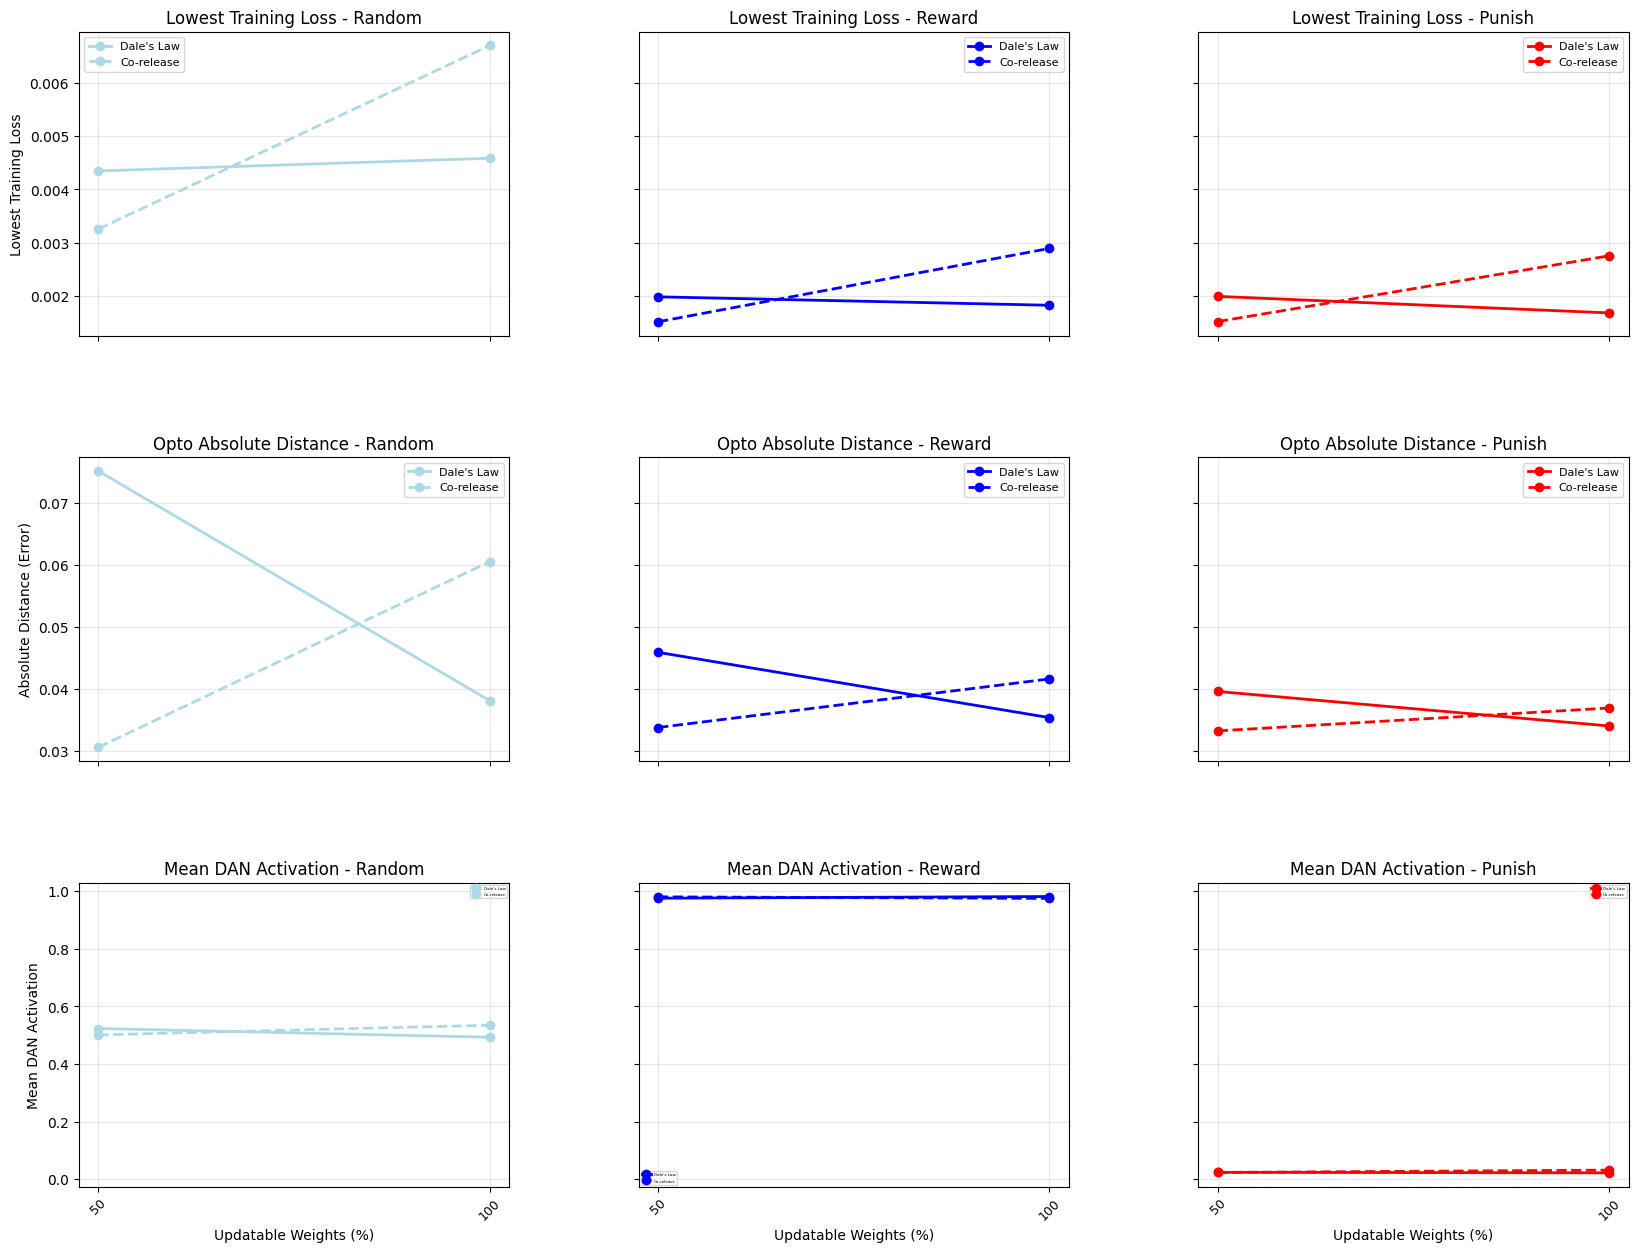

In [17]:
updatable_weights_plot(updatable_weights_ls, min_train_loss_by_dales, opto_abs_distance_by_dales, mean_DAN_activations_by_dales)